# benchmark IBD calling accuracy

In [1]:
from plot_utility import *

# compare ancIBD with IBIS, no mask

doing bin: (5, 6)
doing bin: (6, 8)
doing bin: (8, 12)
doing bin: (12, inf)


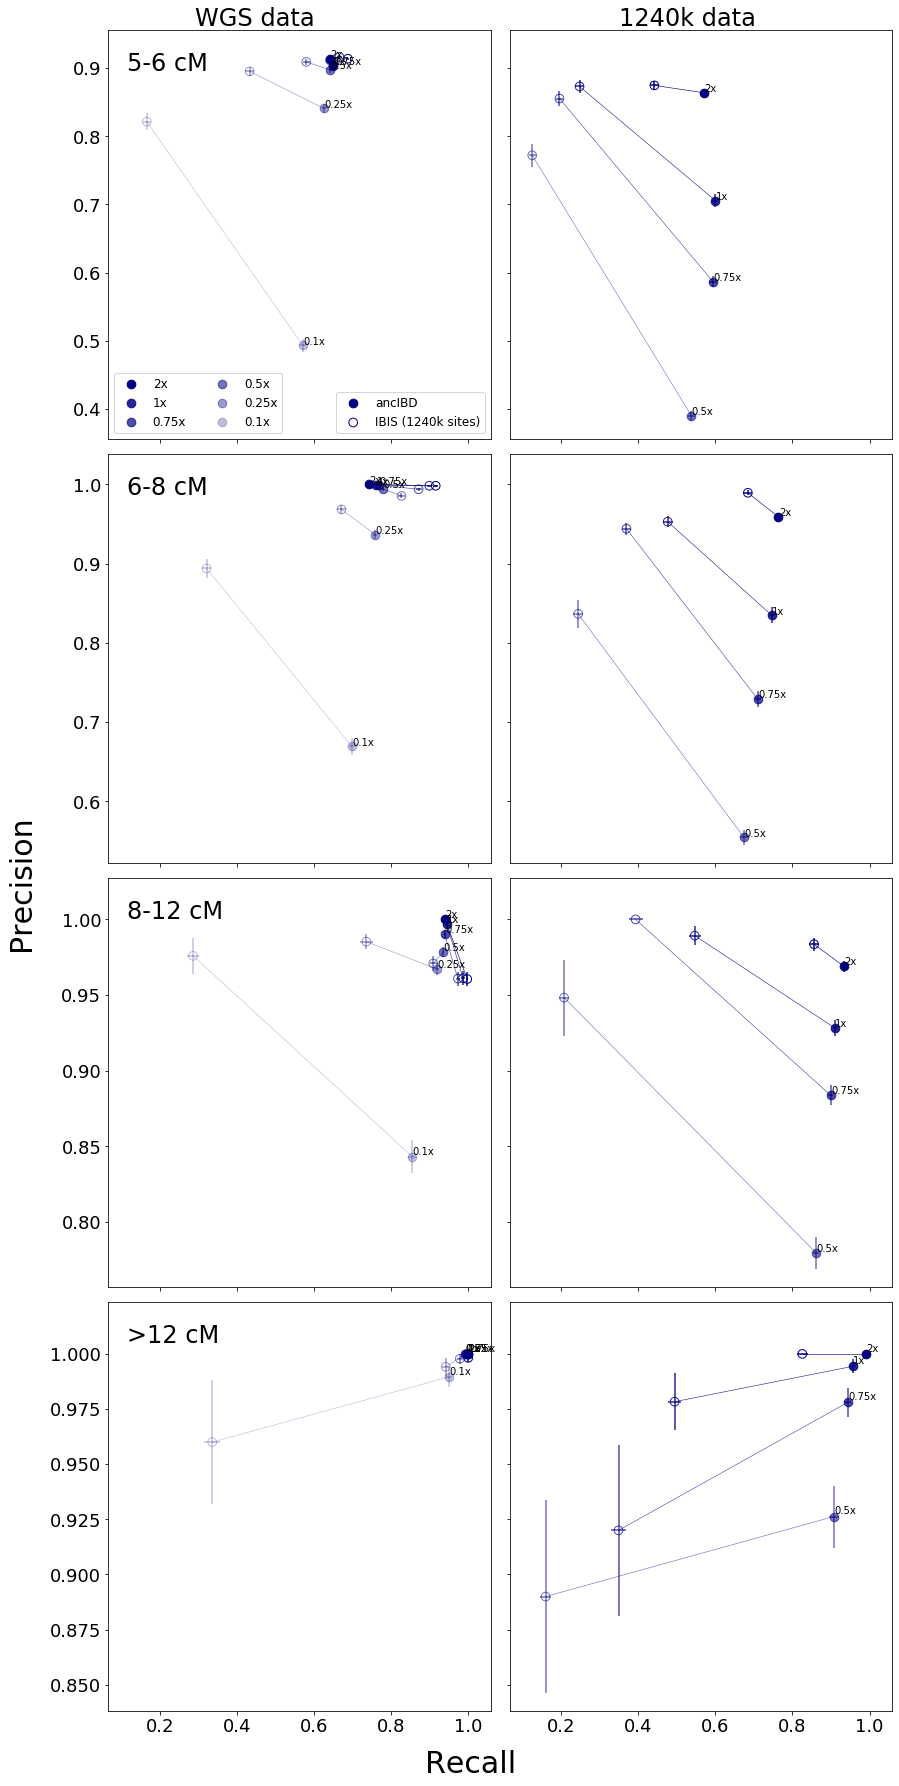

In [5]:
import matplotlib.pyplot as plt

bins = [(5,6), (6,8), (8,12), (12,np.inf)]
covs = ['cov2', 'cov1', 'cov3over4', 'cov1over2', 'cov1over4', 'cov1over10']
cov2str = ['2x', '1x', '0.75x', '0.5x', '0.25x', '0.1x']
alphas = [1.0, 0.85, 0.7, 0.55, 0.4, 0.25]
fig, axs = plt.subplots(4, 2, sharex=True, sharey='row', figsize=(12, 24), tight_layout=True)

shift_x = 1e-3
shift_y = 1e-3

#masks = readMaskTrack('/mnt/archgen/users/yilei/tools/hapBLOCK/empirical/v51_6cM/mask.track')
masks = None

path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion/MAC0/merged.glimpse.GP99.transversion_only.seg'
#path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion/MAC0/merged.glimpse.GP99.transversion_only_masked.seg'

#path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion_trim5/merged.glimpse.GP99.transversion_only.seg'

for index, bin in enumerate(bins):
    print(f'doing bin: {bin}')
    i = index
    j = 0
    ppv_ancIBD, ppv_se_ancIBD, sensitivity_ancIBD, sensitivity_se_ancIBD = get_ppv_sensitivity_allCov(covs, bin[0], bin[1], path2GroundTruth, datatype="wgs", mode='ancIBD', masks=masks, snpcm=220)
    ppv_ibis, ppv_se_ibis, sensitivity_ibis, sensitivity_se_ibis = get_ppv_sensitivity_allCov(covs, bin[0], bin[1], path2GroundTruth, datatype="wgs", mode='IBIS_1240k', masks=masks, snpcm=220)

    legend_obj = []
    for k in range(len(covs)):
        scatter1 = axs[i,j].scatter(sensitivity_ancIBD[k], ppv_ancIBD[k], color='navy', alpha=alphas[k], marker='o', s=75, label=cov2str[k])
        scatter2 = axs[i,j].scatter(sensitivity_ibis[k], ppv_ibis[k], color='navy', alpha=alphas[k], marker='o', facecolors='none', s=75)
        axs[i,j].plot([sensitivity_ancIBD[k], sensitivity_ibis[k]], [ppv_ancIBD[k], ppv_ibis[k]], color='navy', alpha=alphas[k], linewidth=0.6)
        axs[i,j].errorbar(sensitivity_ancIBD[k], ppv_ancIBD[k], yerr=ppv_se_ancIBD[k], xerr=sensitivity_se_ancIBD[k], ecolor='navy', alpha=alphas[k])
        axs[i,j].errorbar(sensitivity_ibis[k], ppv_ibis[k], yerr=ppv_se_ibis[k], xerr=sensitivity_se_ibis[k], ecolor='navy', alpha=alphas[k])

        if k == 0:
            legend_obj.append(scatter1)
            legend_obj.append(scatter2)
    if i == 0:
        legend1 = axs[i,j].legend(loc='lower left', ncol=2, fontsize='large')
        axs[i,j].legend(legend_obj, ['ancIBD', 'IBIS (1240k sites)'], loc='lower right', fontsize='large')
        axs[i,j].add_artist(legend1)

    axs[i,j].annotate('2x', (shift_x + sensitivity_ancIBD[0], shift_y + ppv_ancIBD[0]))
    axs[i,j].annotate('1x', (shift_x + sensitivity_ancIBD[1], shift_y + ppv_ancIBD[1]))
    axs[i,j].annotate('0.75x', (shift_x + sensitivity_ancIBD[2], shift_y + ppv_ancIBD[2]))
    axs[i,j].annotate('0.5x', (shift_x + sensitivity_ancIBD[3], shift_y + ppv_ancIBD[3]))
    axs[i,j].annotate('0.25x', (shift_x + sensitivity_ancIBD[4], shift_y + ppv_ancIBD[4]))
    axs[i,j].annotate('0.1x', (shift_x + sensitivity_ancIBD[5], shift_y + ppv_ancIBD[5]))

    axs[i,j].tick_params(axis='both', labelsize=18)


  

    titleStr = f'{bin[0]}-{bin[1]} cM' if index != len(bins) -1 else f'>{bin[0]} cM'
    axs[i,j].text(0.05, 0.9, titleStr, fontsize=24, transform=axs[i,j].transAxes)




# #############
# ### plot results for downsampled 1240k bam files
for index, bin in enumerate(bins):
    i = index
    j = 1

    ppv_ancIBD1240k, ppv_se_ancIBD1240k, sensitivity_ancIBD1240k, sensitivity_se_ancIBD1240k = get_ppv_sensitivity_allCov(covs[:4], bin[0], bin[1], path2GroundTruth, datatype="1240k", mode='ancIBD', masks=masks, snpcm=220)
    ppv_ibis1240k, ppv_se_ibis1240k, sensitivity_ibis1240k, sensitivity_se_ibis1240k = get_ppv_sensitivity_allCov(covs[:4], bin[0], bin[1], path2GroundTruth, datatype="1240k", mode='IBIS_1240k', masks=masks, snpcm=220)
    
    for k in range(len(covs[:4])):
        color_index = k
        axs[i,j].scatter(sensitivity_ancIBD1240k[k], ppv_ancIBD1240k[k], color='navy', alpha=alphas[color_index], marker='o', s=75)
        axs[i,j].scatter(sensitivity_ibis1240k[k], ppv_ibis1240k[k], color='navy', alpha=alphas[color_index], marker='o', facecolors='none', s=75)
        axs[i,j].plot([sensitivity_ancIBD1240k[k], sensitivity_ibis1240k[k]], [ppv_ancIBD1240k[k], ppv_ibis1240k[k]], color='navy', alpha=alphas[color_index], linewidth=0.6)
        axs[i,j].errorbar(sensitivity_ancIBD1240k[k], ppv_ancIBD1240k[k], yerr=ppv_se_ancIBD1240k[k], xerr=sensitivity_se_ancIBD1240k[k], ecolor='navy', alpha=alphas[color_index])
        axs[i,j].errorbar(sensitivity_ibis1240k[k], ppv_ibis1240k[k], yerr=ppv_se_ibis1240k[k], xerr=sensitivity_se_ibis1240k[k], ecolor='navy', alpha=alphas[color_index])

    axs[i,j].annotate('2x', (shift_x + sensitivity_ancIBD1240k[0], shift_y + ppv_ancIBD1240k[0]))
    axs[i,j].annotate('1x', (shift_x + sensitivity_ancIBD1240k[1], shift_y + ppv_ancIBD1240k[1]))
    axs[i,j].annotate('0.75x', (shift_x + sensitivity_ancIBD1240k[2], shift_y + ppv_ancIBD1240k[2]))
    axs[i,j].annotate('0.5x', (shift_x + sensitivity_ancIBD1240k[3], shift_y + ppv_ancIBD1240k[3]))

    axs[i,j].tick_params(axis='both', labelsize=18)



fig.text(0.5, -0.01, 'Recall', ha='center', va='center', fontsize=30)
fig.text(-0.02, 0.5, 'Precision', ha='center', va='center', rotation='vertical', fontsize=30)
fig.text(0.25, 1.0, 'WGS data', ha='center', va='center', fontsize=24)
fig.text(0.75, 1.0, '1240k data', ha='center', va='center', fontsize=24)

plt.savefig('ibd_benchmark_glimpse_1240k.png', dpi=300, bbox_inches = "tight")
plt.savefig('ibd_benchmark_glimpse_1240k.pdf', dpi=300, bbox_inches = "tight")

# compare ancIBD with IBIS,  with mask

doing bin: (5, 6)
doing bin: (6, 8)
doing bin: (8, 12)
doing bin: (12, inf)


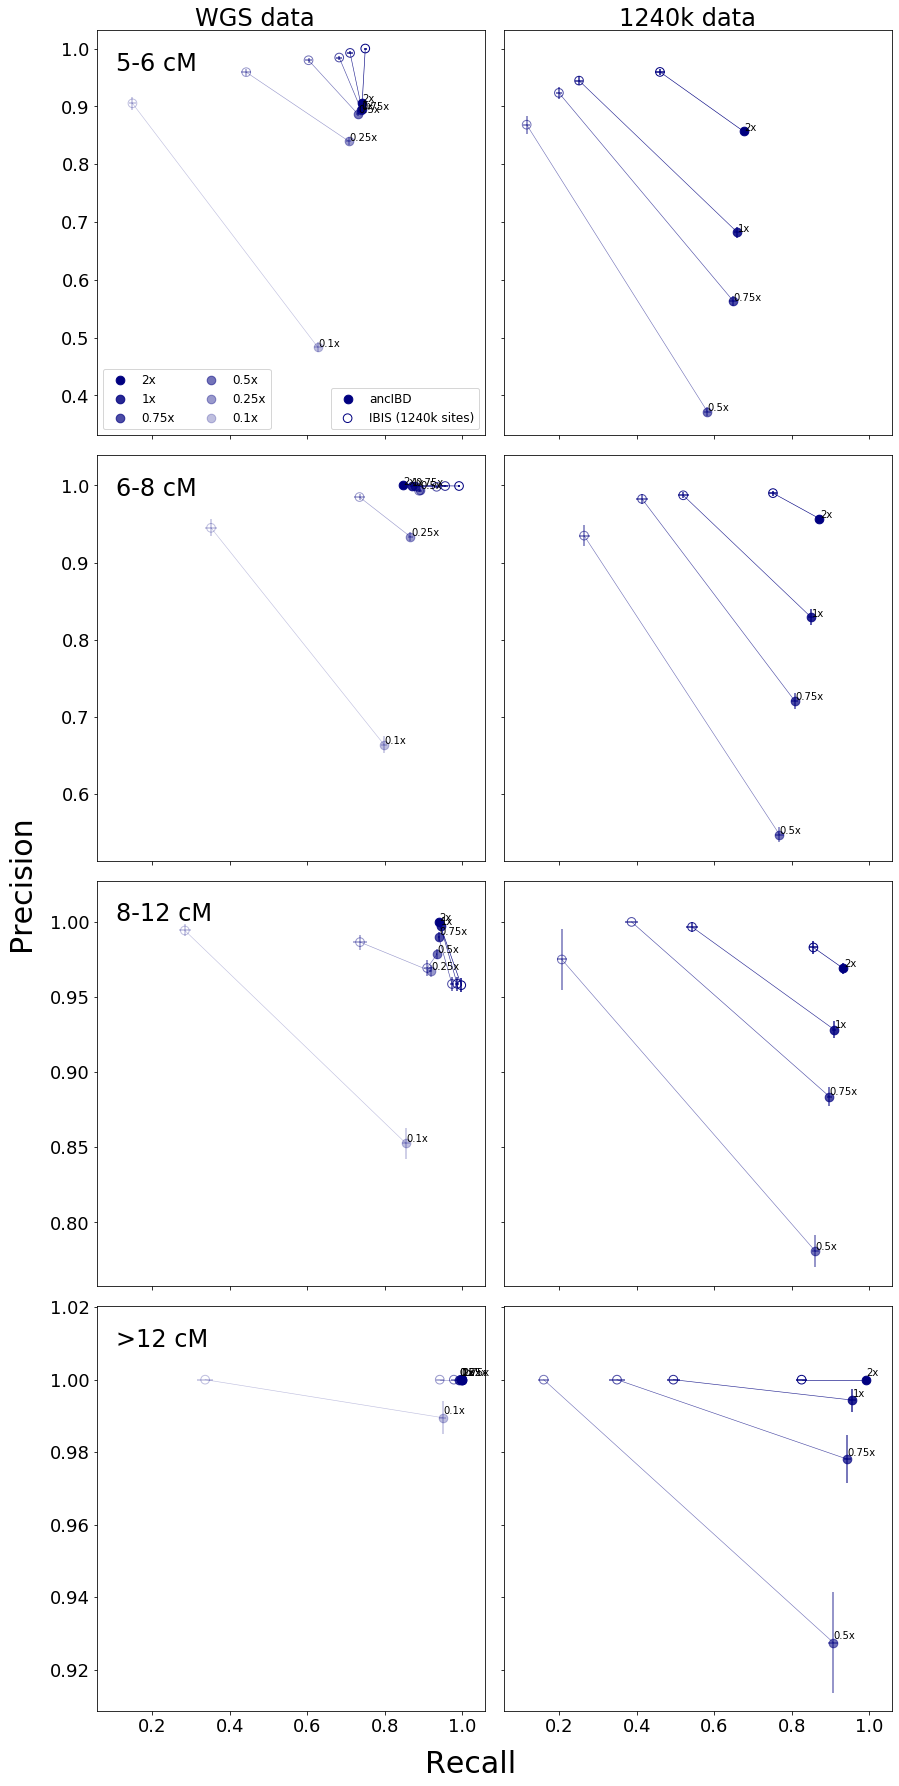

In [6]:
import matplotlib.pyplot as plt

bins = [(5,6), (6,8), (8,12), (12,np.inf)]
covs = ['cov2', 'cov1', 'cov3over4', 'cov1over2', 'cov1over4', 'cov1over10']
cov2str = ['2x', '1x', '0.75x', '0.5x', '0.25x', '0.1x']
alphas = [1.0, 0.85, 0.7, 0.55, 0.4, 0.25]
fig, axs = plt.subplots(4, 2, sharex=True, sharey='row', figsize=(12, 24), tight_layout=True)

shift_x = 1e-3
shift_y = 1e-3

masks = readMaskTrack('/mnt/archgen/users/yilei/tools/hapBLOCK/empirical/v51_6cM/mask.track')

#path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion/MAC0/merged.glimpse.GP99.transversion_only.seg'
path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion/MAC0/merged.glimpse.GP99.transversion_only_masked.seg'

#path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion_trim5/merged.glimpse.GP99.transversion_only.seg'

for index, bin in enumerate(bins):
    print(f'doing bin: {bin}')
    i = index
    j = 0
    ppv_ancIBD, ppv_se_ancIBD, sensitivity_ancIBD, sensitivity_se_ancIBD = get_ppv_sensitivity_allCov(covs, bin[0], bin[1], path2GroundTruth, datatype="wgs", mode='ancIBD', masks=masks, snpcm=220)
    ppv_ibis, ppv_se_ibis, sensitivity_ibis, sensitivity_se_ibis = get_ppv_sensitivity_allCov(covs, bin[0], bin[1], path2GroundTruth, datatype="wgs", mode='IBIS_1240k', masks=masks, snpcm=220)

    legend_obj = []
    for k in range(len(covs)):
        scatter1 = axs[i,j].scatter(sensitivity_ancIBD[k], ppv_ancIBD[k], color='navy', alpha=alphas[k], marker='o', s=75, label=cov2str[k])
        scatter2 = axs[i,j].scatter(sensitivity_ibis[k], ppv_ibis[k], color='navy', alpha=alphas[k], marker='o', facecolors='none', s=75)
        axs[i,j].plot([sensitivity_ancIBD[k], sensitivity_ibis[k]], [ppv_ancIBD[k], ppv_ibis[k]], color='navy', alpha=alphas[k], linewidth=0.6)
        axs[i,j].errorbar(sensitivity_ancIBD[k], ppv_ancIBD[k], yerr=ppv_se_ancIBD[k], xerr=sensitivity_se_ancIBD[k], ecolor='navy', alpha=alphas[k])
        axs[i,j].errorbar(sensitivity_ibis[k], ppv_ibis[k], yerr=ppv_se_ibis[k], xerr=sensitivity_se_ibis[k], ecolor='navy', alpha=alphas[k])
        if k == 0:
            legend_obj.append(scatter1)
            legend_obj.append(scatter2)
    if i == 0:
        legend1 = axs[i,j].legend(loc='lower left', ncol=2, fontsize='large')
        axs[i,j].legend(legend_obj, ['ancIBD', 'IBIS (1240k sites)'], loc='lower right', fontsize='large')
        axs[i,j].add_artist(legend1)

    axs[i,j].annotate('2x', (shift_x + sensitivity_ancIBD[0], shift_y + ppv_ancIBD[0]))
    axs[i,j].annotate('1x', (shift_x + sensitivity_ancIBD[1], shift_y + ppv_ancIBD[1]))
    axs[i,j].annotate('0.75x', (shift_x + sensitivity_ancIBD[2], shift_y + ppv_ancIBD[2]))
    axs[i,j].annotate('0.5x', (shift_x + sensitivity_ancIBD[3], shift_y + ppv_ancIBD[3]))
    axs[i,j].annotate('0.25x', (shift_x + sensitivity_ancIBD[4], shift_y + ppv_ancIBD[4]))
    axs[i,j].annotate('0.1x', (shift_x + sensitivity_ancIBD[5], shift_y + ppv_ancIBD[5]))

    axs[i,j].tick_params(axis='both', labelsize=18)


  

    titleStr = f'{bin[0]}-{bin[1]} cM' if index != len(bins) -1 else f'>{bin[0]} cM'
    axs[i,j].text(0.05, 0.9, titleStr, fontsize=24, transform=axs[i,j].transAxes)




# #############
# ### plot results for downsampled 1240k bam files
for index, bin in enumerate(bins):
    i = index
    j = 1

    ppv_ancIBD1240k, ppv_se_ancIBD1240k, sensitivity_ancIBD1240k, sensitivity_se_ancIBD1240k = get_ppv_sensitivity_allCov(covs[:4], bin[0], bin[1], path2GroundTruth, datatype="1240k", mode='ancIBD', masks=masks, snpcm=220)
    ppv_ibis1240k, ppv_se_ibis1240k, sensitivity_ibis1240k, sensitivity_se_ibis1240k = get_ppv_sensitivity_allCov(covs[:4], bin[0], bin[1], path2GroundTruth, datatype="1240k", mode='IBIS_1240k', masks=masks, snpcm=220)
    
    for k in range(len(covs[:4])):
        color_index = k
        axs[i,j].scatter(sensitivity_ancIBD1240k[k], ppv_ancIBD1240k[k], color='navy', alpha=alphas[color_index], marker='o', s=75)
        axs[i,j].scatter(sensitivity_ibis1240k[k], ppv_ibis1240k[k], color='navy', alpha=alphas[color_index], marker='o', facecolors='none', s=75)
        axs[i,j].plot([sensitivity_ancIBD1240k[k], sensitivity_ibis1240k[k]], [ppv_ancIBD1240k[k], ppv_ibis1240k[k]], color='navy', alpha=alphas[color_index], linewidth=0.6)
        axs[i,j].errorbar(sensitivity_ancIBD1240k[k], ppv_ancIBD1240k[k], yerr=ppv_se_ancIBD1240k[k], xerr=sensitivity_se_ancIBD1240k[k], ecolor='navy', alpha=alphas[k])
        axs[i,j].errorbar(sensitivity_ibis1240k[k], ppv_ibis1240k[k], yerr=ppv_se_ibis1240k[k], xerr=sensitivity_se_ibis1240k[k], ecolor='navy', alpha=alphas[k])

    axs[i,j].annotate('2x', (shift_x + sensitivity_ancIBD1240k[0], shift_y + ppv_ancIBD1240k[0]))
    axs[i,j].annotate('1x', (shift_x + sensitivity_ancIBD1240k[1], shift_y + ppv_ancIBD1240k[1]))
    axs[i,j].annotate('0.75x', (shift_x + sensitivity_ancIBD1240k[2], shift_y + ppv_ancIBD1240k[2]))
    axs[i,j].annotate('0.5x', (shift_x + sensitivity_ancIBD1240k[3], shift_y + ppv_ancIBD1240k[3]))

    axs[i,j].tick_params(axis='both', labelsize=18)



fig.text(0.5, -0.01, 'Recall', ha='center', va='center', fontsize=30)
fig.text(-0.02, 0.5, 'Precision', ha='center', va='center', rotation='vertical', fontsize=30)
fig.text(0.25, 1.0, 'WGS data', ha='center', va='center', fontsize=24)
fig.text(0.75, 1.0, '1240k data', ha='center', va='center', fontsize=24)

plt.savefig('ibd_benchmark_glimpse_1240k_mask.png', dpi=300, bbox_inches = "tight")
plt.savefig('ibd_benchmark_glimpse_1240k_mask.pdf', dpi=300, bbox_inches = "tight")

# compare IBIS using 1240k sites and 1000G MAF5 sites

doing bin: (5, 6)
doing bin: (6, 8)
doing bin: (8, 12)
doing bin: (12, inf)


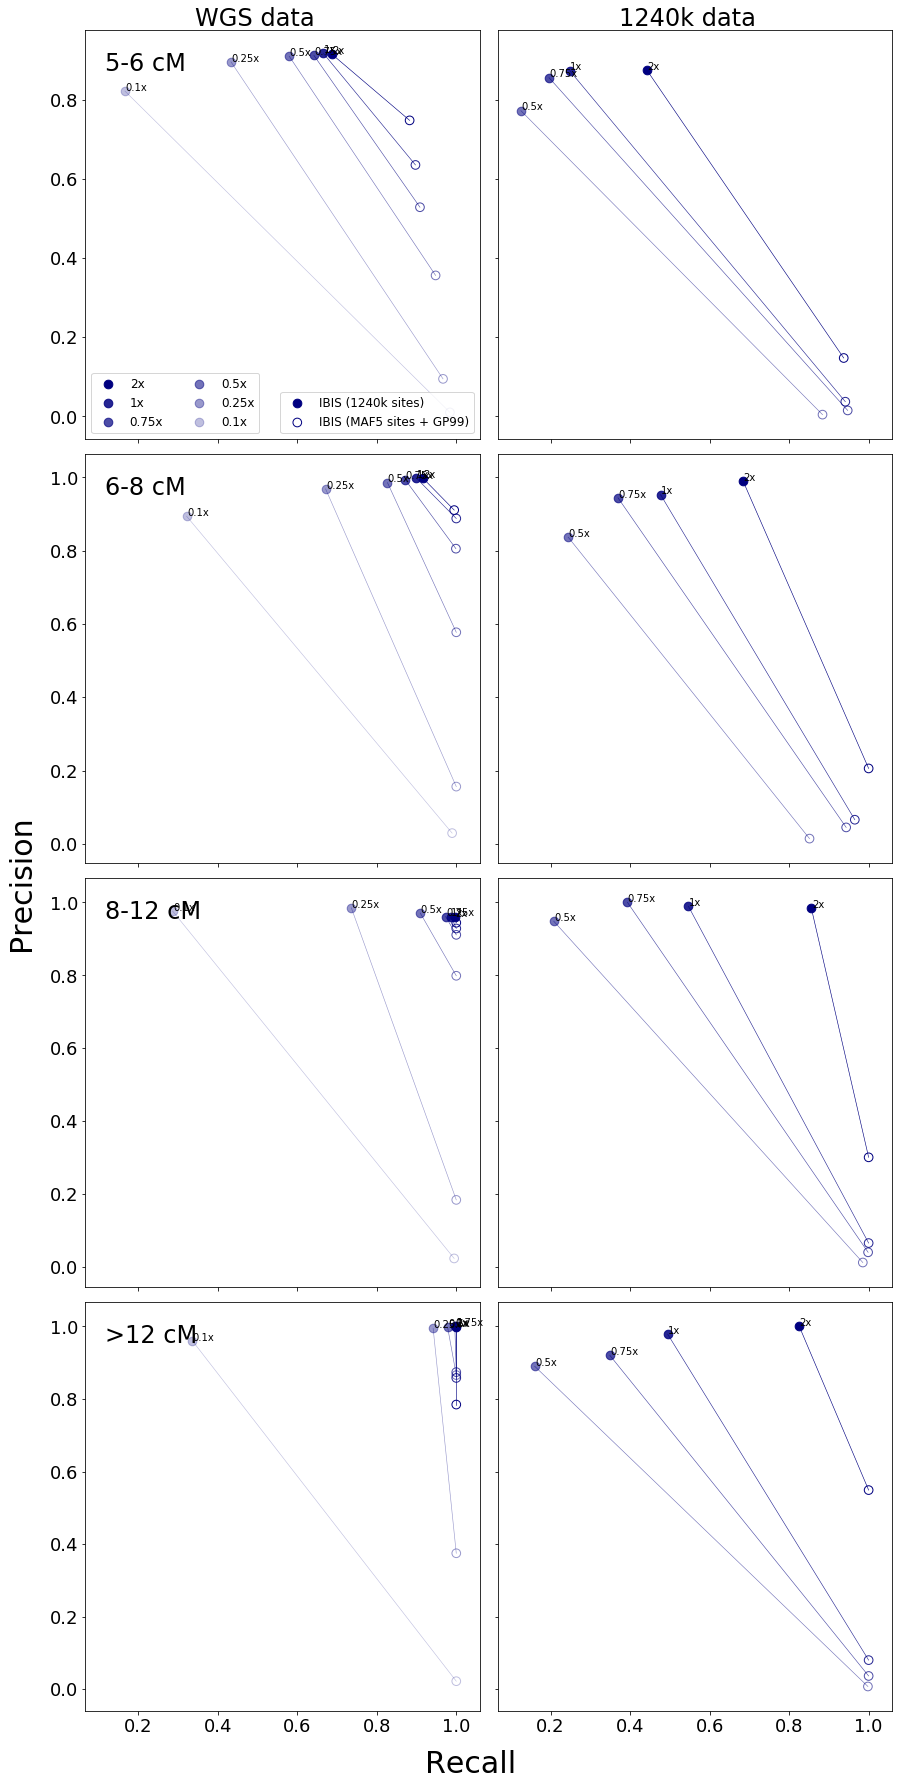

In [28]:
import matplotlib.pyplot as plt

bins = [(5,6), (6,8), (8,12), (12,np.inf)]
covs = ['cov2', 'cov1', 'cov3over4', 'cov1over2', 'cov1over4', 'cov1over10']
cov2str = ['2x', '1x', '0.75x', '0.5x', '0.25x', '0.1x']
alphas = [1.0, 0.85, 0.7, 0.55, 0.4, 0.25]
fig, axs = plt.subplots(4, 2, sharex=True, sharey='row', figsize=(12, 24), tight_layout=True)

shift_x = 1e-3
shift_y = 1e-3

#masks = readMaskTrack('/mnt/archgen/users/yilei/tools/hapBLOCK/empirical/v51_6cM/mask.track')
masks = None

path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion/MAC0/merged.glimpse.GP99.transversion_only.seg'
#path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion/MAC0/merged.glimpse.GP99.transversion_only_masked.seg'

#path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion_trim5/merged.glimpse.GP99.transversion_only.seg'

for index, bin in enumerate(bins):
    print(f'doing bin: {bin}')
    i = index
    j = 0
    ppv_ancIBD, ppv_se_ancIBD, sensitivity_ancIBD, sensitivity_se_ancIBD = get_ppv_sensitivity_allCov(covs, bin[0], bin[1], path2GroundTruth, datatype="wgs", mode='IBIS_1240k', masks=masks, snpcm=220)
    ppv_ibis, ppv_se_ibis, sensitivity_ibis, sensitivity_se_ibis = get_ppv_sensitivity_allCov(covs, bin[0], bin[1], path2GroundTruth, datatype="wgs", mode='IBIS_MAF5', masks=masks, snpcm=220)

    legend_obj = []
    for k in range(len(covs)):
        scatter1 = axs[i,j].scatter(sensitivity_ancIBD[k], ppv_ancIBD[k], color='navy', alpha=alphas[k], marker='o', s=75, label=cov2str[k])
        scatter2 = axs[i,j].scatter(sensitivity_ibis[k], ppv_ibis[k], color='navy', alpha=alphas[k], marker='o', facecolors='none', s=75)
        axs[i,j].plot([sensitivity_ancIBD[k], sensitivity_ibis[k]], [ppv_ancIBD[k], ppv_ibis[k]], color='navy', alpha=alphas[k], linewidth=0.6)
        if k == 0:
            legend_obj.append(scatter1)
            legend_obj.append(scatter2)
    if i == 0:
        legend1 = axs[i,j].legend(loc='lower left', ncol=2, fontsize='large')
        axs[i,j].legend(legend_obj, ['IBIS (1240k sites)', 'IBIS (MAF5 sites + GP99)'], loc='lower right', fontsize='large')
        axs[i,j].add_artist(legend1)

    axs[i,j].annotate('2x', (shift_x + sensitivity_ancIBD[0], shift_y + ppv_ancIBD[0]))
    axs[i,j].annotate('1x', (shift_x + sensitivity_ancIBD[1], shift_y + ppv_ancIBD[1]))
    axs[i,j].annotate('0.75x', (shift_x + sensitivity_ancIBD[2], shift_y + ppv_ancIBD[2]))
    axs[i,j].annotate('0.5x', (shift_x + sensitivity_ancIBD[3], shift_y + ppv_ancIBD[3]))
    axs[i,j].annotate('0.25x', (shift_x + sensitivity_ancIBD[4], shift_y + ppv_ancIBD[4]))
    axs[i,j].annotate('0.1x', (shift_x + sensitivity_ancIBD[5], shift_y + ppv_ancIBD[5]))

    axs[i,j].tick_params(axis='both', labelsize=18)


  

    titleStr = f'{bin[0]}-{bin[1]} cM' if index != len(bins) -1 else f'>{bin[0]} cM'
    axs[i,j].text(0.05, 0.9, titleStr, fontsize=24, transform=axs[i,j].transAxes)




# #############
# ### plot results for downsampled 1240k bam files
for index, bin in enumerate(bins):
    i = index
    j = 1

    ppv_ancIBD1240k, ppv_se_ancIBD1240k, sensitivity_ancIBD1240k, sensitivity_se_ancIBD1240k = get_ppv_sensitivity_allCov(covs[:4], bin[0], bin[1], path2GroundTruth, datatype="1240k", mode='IBIS_1240k', masks=masks, snpcm=220)
    ppv_ibis1240k, ppv_se_ibis1240k, sensitivity_ibis1240k, sensitivity_se_ibis1240k = get_ppv_sensitivity_allCov(covs[:4], bin[0], bin[1], path2GroundTruth, datatype="1240k", mode='IBIS_MAF5', masks=masks, snpcm=220)
    
    for k in range(len(covs[:4])):
        color_index = k
        axs[i,j].scatter(sensitivity_ancIBD1240k[k], ppv_ancIBD1240k[k], color='navy', alpha=alphas[color_index], marker='o', s=75)
        axs[i,j].scatter(sensitivity_ibis1240k[k], ppv_ibis1240k[k], color='navy', alpha=alphas[color_index], marker='o', facecolors='none', s=75)
        axs[i,j].plot([sensitivity_ancIBD1240k[k], sensitivity_ibis1240k[k]], [ppv_ancIBD1240k[k], ppv_ibis1240k[k]], color='navy', alpha=alphas[color_index], linewidth=0.6)


    axs[i,j].annotate('2x', (shift_x + sensitivity_ancIBD1240k[0], shift_y + ppv_ancIBD1240k[0]))
    axs[i,j].annotate('1x', (shift_x + sensitivity_ancIBD1240k[1], shift_y + ppv_ancIBD1240k[1]))
    axs[i,j].annotate('0.75x', (shift_x + sensitivity_ancIBD1240k[2], shift_y + ppv_ancIBD1240k[2]))
    axs[i,j].annotate('0.5x', (shift_x + sensitivity_ancIBD1240k[3], shift_y + ppv_ancIBD1240k[3]))

    axs[i,j].tick_params(axis='both', labelsize=18)



fig.text(0.5, -0.01, 'Recall', ha='center', va='center', fontsize=30)
fig.text(-0.02, 0.5, 'Precision', ha='center', va='center', rotation='vertical', fontsize=30)
fig.text(0.25, 1.0, 'WGS data', ha='center', va='center', fontsize=24)
fig.text(0.75, 1.0, '1240k data', ha='center', va='center', fontsize=24)

plt.savefig('ibd_benchmark_SNPset_IBIS.png', dpi=300, bbox_inches = "tight")
plt.savefig('ibd_benchmark_SNPset_IBIS.pdf', dpi=300, bbox_inches = "tight")

# compare ancIBD with 1240k sites and 1000g MAF5 sites

doing bin: (5, 6)
doing bin: (6, 8)
doing bin: (8, 12)
doing bin: (12, inf)


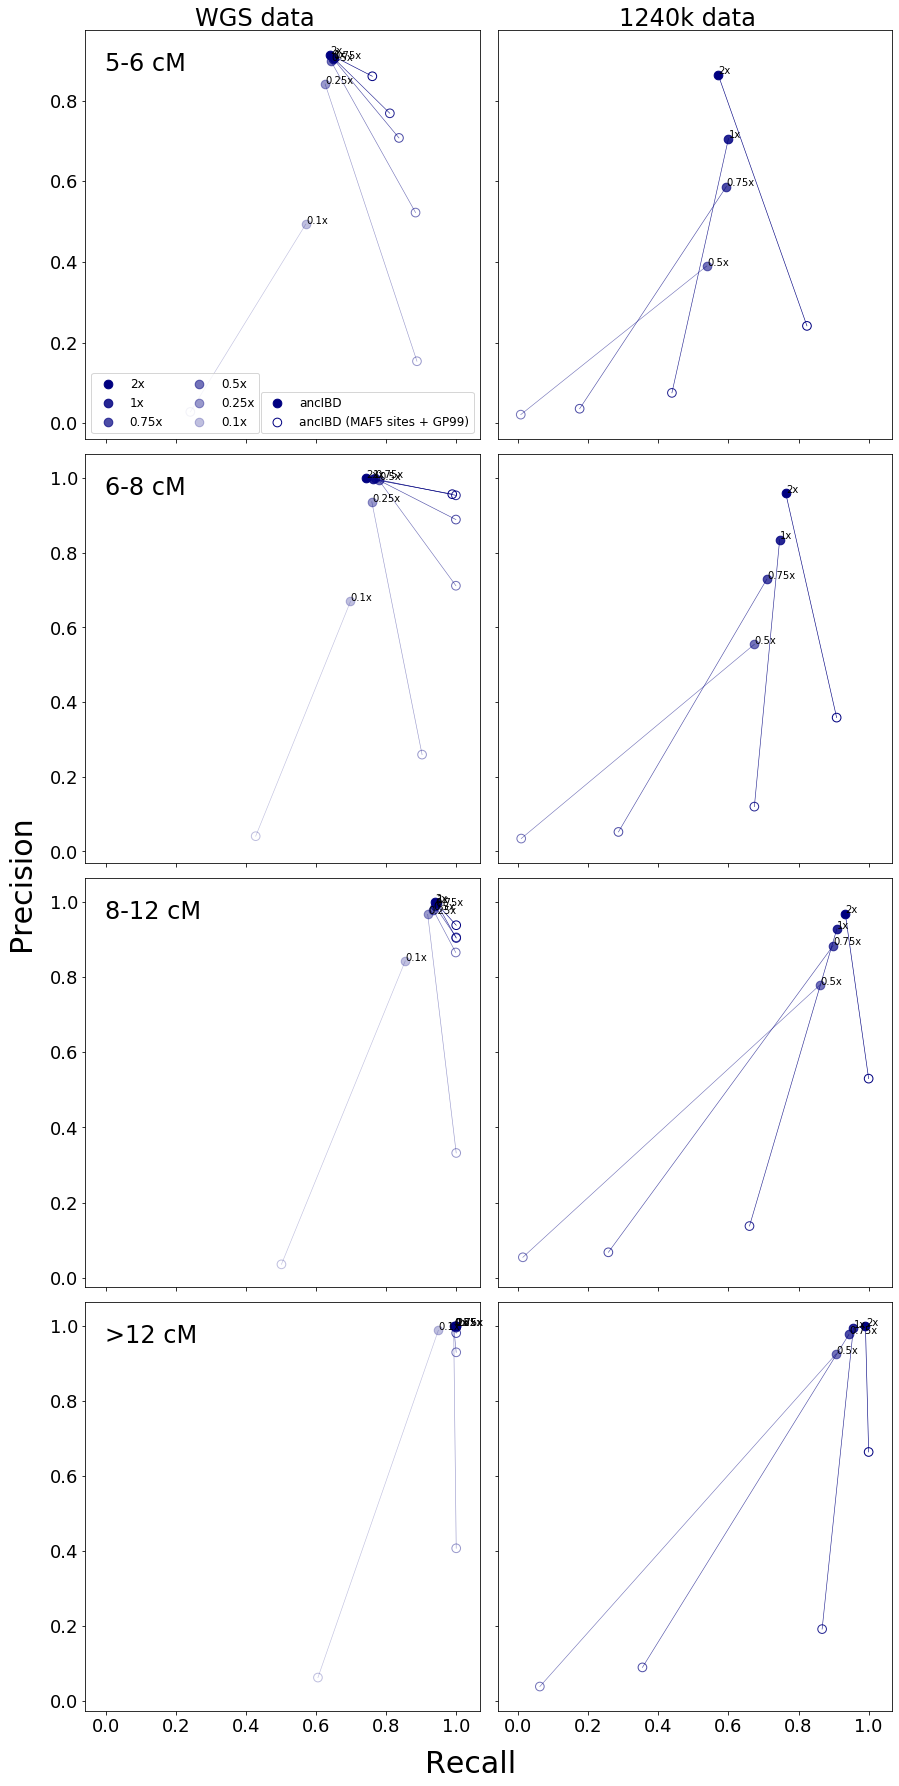

In [29]:
import matplotlib.pyplot as plt

bins = [(5,6), (6,8), (8,12), (12,np.inf)]
covs = ['cov2', 'cov1', 'cov3over4', 'cov1over2', 'cov1over4', 'cov1over10']
cov2str = ['2x', '1x', '0.75x', '0.5x', '0.25x', '0.1x']
alphas = [1.0, 0.85, 0.7, 0.55, 0.4, 0.25]
fig, axs = plt.subplots(4, 2, sharex=True, sharey='row', figsize=(12, 24), tight_layout=True)

shift_x = 1e-3
shift_y = 1e-3

#masks = readMaskTrack('/mnt/archgen/users/yilei/tools/hapBLOCK/empirical/v51_6cM/mask.track')
masks = None

path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion/MAC0/merged.glimpse.GP99.transversion_only.seg'
#path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion/MAC0/merged.glimpse.GP99.transversion_only_masked.seg'

#path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion_trim5/merged.glimpse.GP99.transversion_only.seg'

for index, bin in enumerate(bins):
    print(f'doing bin: {bin}')
    i = index
    j = 0
    ppv_ancIBD, ppv_se_ancIBD, sensitivity_ancIBD, sensitivity_se_ancIBD = get_ppv_sensitivity_allCov(covs, bin[0], bin[1], path2GroundTruth, datatype="wgs", mode='ancIBD', masks=masks, snpcm=220)
    ppv_ibis, ppv_se_ibis, sensitivity_ibis, sensitivity_se_ibis = get_ppv_sensitivity_allCov(covs, bin[0], bin[1], path2GroundTruth, datatype="wgs", mode='ancIBD_1KG_MAF5', masks=masks, snpcm=220)

    legend_obj = []
    for k in range(len(covs)):
        scatter1 = axs[i,j].scatter(sensitivity_ancIBD[k], ppv_ancIBD[k], color='navy', alpha=alphas[k], marker='o', s=75, label=cov2str[k])
        scatter2 = axs[i,j].scatter(sensitivity_ibis[k], ppv_ibis[k], color='navy', alpha=alphas[k], marker='o', facecolors='none', s=75)
        axs[i,j].plot([sensitivity_ancIBD[k], sensitivity_ibis[k]], [ppv_ancIBD[k], ppv_ibis[k]], color='navy', alpha=alphas[k], linewidth=0.6)
        if k == 0:
            legend_obj.append(scatter1)
            legend_obj.append(scatter2)
    if i == 0:
        legend1 = axs[i,j].legend(loc='lower left', ncol=2, fontsize='large')
        axs[i,j].legend(legend_obj, ['ancIBD', 'ancIBD (MAF5 sites + GP99)'], loc='lower right', fontsize='large')
        axs[i,j].add_artist(legend1)

    axs[i,j].annotate('2x', (shift_x + sensitivity_ancIBD[0], shift_y + ppv_ancIBD[0]))
    axs[i,j].annotate('1x', (shift_x + sensitivity_ancIBD[1], shift_y + ppv_ancIBD[1]))
    axs[i,j].annotate('0.75x', (shift_x + sensitivity_ancIBD[2], shift_y + ppv_ancIBD[2]))
    axs[i,j].annotate('0.5x', (shift_x + sensitivity_ancIBD[3], shift_y + ppv_ancIBD[3]))
    axs[i,j].annotate('0.25x', (shift_x + sensitivity_ancIBD[4], shift_y + ppv_ancIBD[4]))
    axs[i,j].annotate('0.1x', (shift_x + sensitivity_ancIBD[5], shift_y + ppv_ancIBD[5]))

    axs[i,j].tick_params(axis='both', labelsize=18)


  

    titleStr = f'{bin[0]}-{bin[1]} cM' if index != len(bins) -1 else f'>{bin[0]} cM'
    axs[i,j].text(0.05, 0.9, titleStr, fontsize=24, transform=axs[i,j].transAxes)




# #############
# ### plot results for downsampled 1240k bam files
for index, bin in enumerate(bins):
    i = index
    j = 1

    ppv_ancIBD1240k, ppv_se_ancIBD1240k, sensitivity_ancIBD1240k, sensitivity_se_ancIBD1240k = get_ppv_sensitivity_allCov(covs[:4], bin[0], bin[1], path2GroundTruth, datatype="1240k", mode='ancIBD', masks=masks, snpcm=220)
    ppv_ibis1240k, ppv_se_ibis1240k, sensitivity_ibis1240k, sensitivity_se_ibis1240k = get_ppv_sensitivity_allCov(covs[:4], bin[0], bin[1], path2GroundTruth, datatype="1240k", mode='ancIBD_1KG_MAF5', masks=masks, snpcm=220)
    
    for k in range(len(covs[:4])):
        color_index = k
        axs[i,j].scatter(sensitivity_ancIBD1240k[k], ppv_ancIBD1240k[k], color='navy', alpha=alphas[color_index], marker='o', s=75)
        axs[i,j].scatter(sensitivity_ibis1240k[k], ppv_ibis1240k[k], color='navy', alpha=alphas[color_index], marker='o', facecolors='none', s=75)
        axs[i,j].plot([sensitivity_ancIBD1240k[k], sensitivity_ibis1240k[k]], [ppv_ancIBD1240k[k], ppv_ibis1240k[k]], color='navy', alpha=alphas[color_index], linewidth=0.6)


    axs[i,j].annotate('2x', (shift_x + sensitivity_ancIBD1240k[0], shift_y + ppv_ancIBD1240k[0]))
    axs[i,j].annotate('1x', (shift_x + sensitivity_ancIBD1240k[1], shift_y + ppv_ancIBD1240k[1]))
    axs[i,j].annotate('0.75x', (shift_x + sensitivity_ancIBD1240k[2], shift_y + ppv_ancIBD1240k[2]))
    axs[i,j].annotate('0.5x', (shift_x + sensitivity_ancIBD1240k[3], shift_y + ppv_ancIBD1240k[3]))

    axs[i,j].tick_params(axis='both', labelsize=18)



fig.text(0.5, -0.01, 'Recall', ha='center', va='center', fontsize=30)
fig.text(-0.02, 0.5, 'Precision', ha='center', va='center', rotation='vertical', fontsize=30)
fig.text(0.25, 1.0, 'WGS data', ha='center', va='center', fontsize=24)
fig.text(0.75, 1.0, '1240k data', ha='center', va='center', fontsize=24)

plt.savefig('ibd_benchmark_SNPset_ancIBD.png', dpi=300, bbox_inches = "tight")
plt.savefig('ibd_benchmark_SNPset_ancIBD.pdf', dpi=300, bbox_inches = "tight")

# plot results for hapIBD

doing bin: (5, 6)
doing bin: (6, 8)
doing bin: (8, 12)
doing bin: (12, inf)


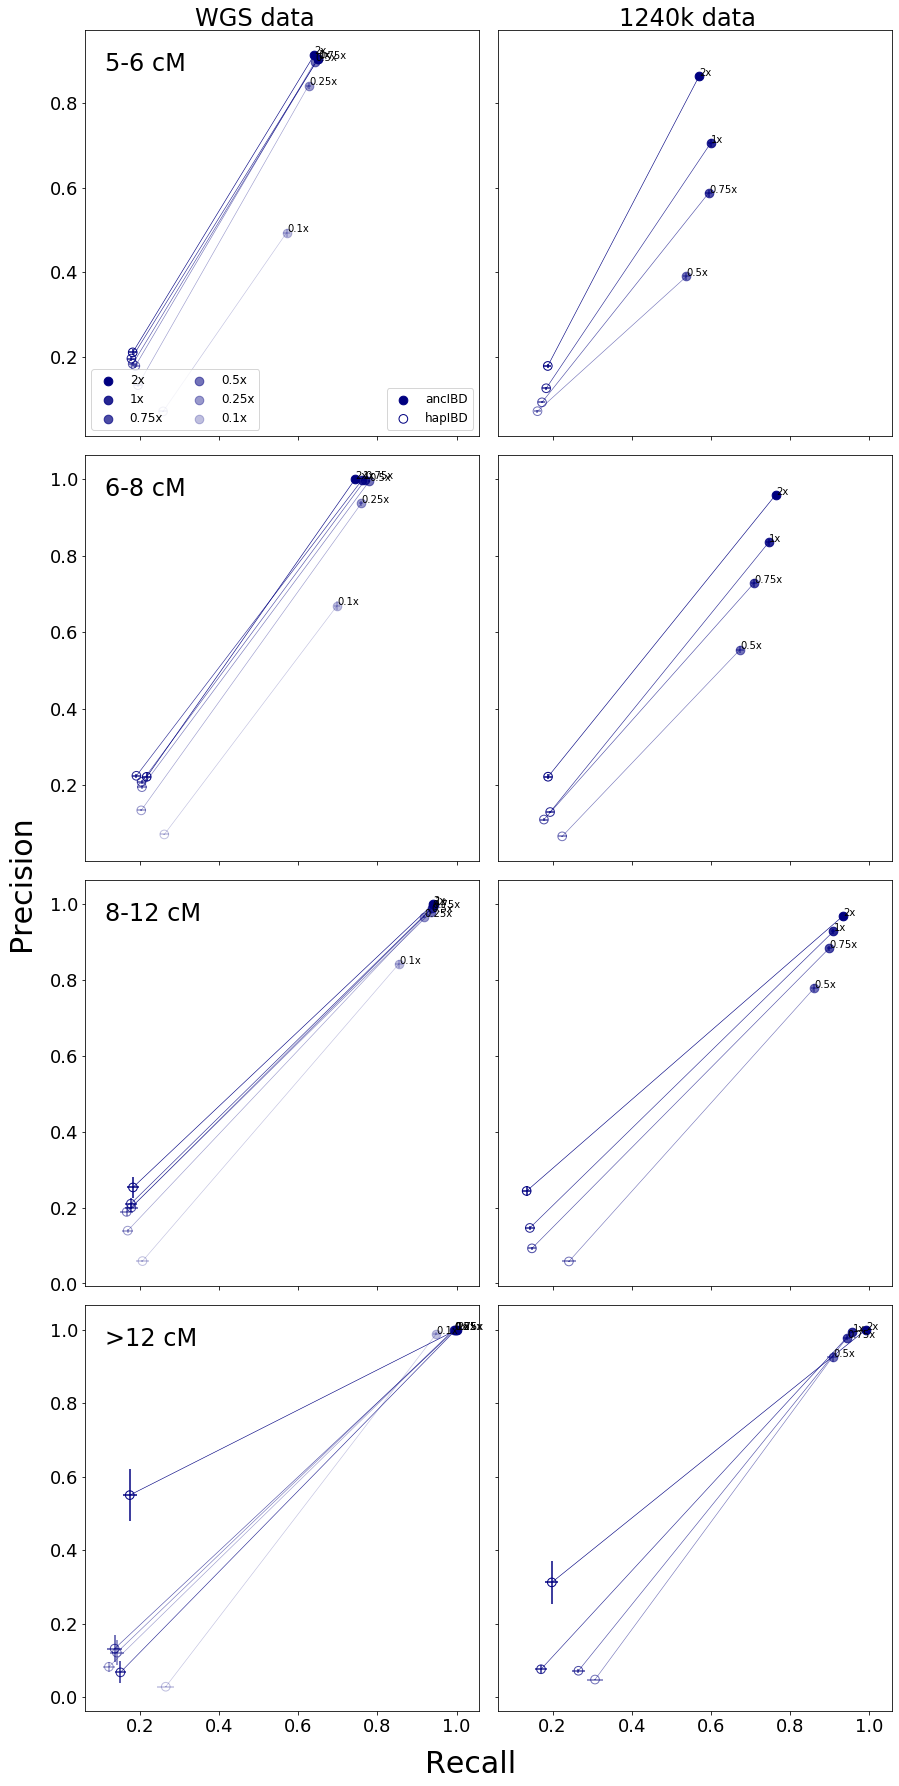

In [7]:
import matplotlib.pyplot as plt

bins = [(5,6), (6,8), (8,12), (12,np.inf)]
covs = ['cov2', 'cov1', 'cov3over4', 'cov1over2', 'cov1over4', 'cov1over10']
cov2str = ['2x', '1x', '0.75x', '0.5x', '0.25x', '0.1x']
alphas = [1.0, 0.85, 0.7, 0.55, 0.4, 0.25]
fig, axs = plt.subplots(4, 2, sharex=True, sharey='row', figsize=(12, 24), tight_layout=True)

shift_x = 1e-3
shift_y = 1e-3

#masks = readMaskTrack('/mnt/archgen/users/yilei/tools/hapBLOCK/empirical/v51_6cM/mask.track')
masks = None

path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion/MAC0/merged.glimpse.GP99.transversion_only.seg'
#path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion/MAC0/merged.glimpse.GP99.transversion_only_masked.seg'

#path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion_trim5/merged.glimpse.GP99.transversion_only.seg'

for index, bin in enumerate(bins):
    print(f'doing bin: {bin}')
    i = index
    j = 0
    ppv_ancIBD, ppv_se_ancIBD, sensitivity_ancIBD, sensitivity_se_ancIBD = get_ppv_sensitivity_allCov(covs, bin[0], bin[1], path2GroundTruth, datatype="wgs", mode='ancIBD', masks=masks, snpcm=220)
    ppv_ibis, ppv_se_ibis, sensitivity_ibis, sensitivity_se_ibis = get_ppv_sensitivity_allCov(covs, bin[0], bin[1], path2GroundTruth, datatype="wgs", mode='hapIBD', masks=masks, snpcm=220)

    legend_obj = []
    for k in range(len(covs)):
        scatter1 = axs[i,j].scatter(sensitivity_ancIBD[k], ppv_ancIBD[k], color='navy', alpha=alphas[k], marker='o', s=75, label=cov2str[k])
        scatter2 = axs[i,j].scatter(sensitivity_ibis[k], ppv_ibis[k], color='navy', alpha=alphas[k], marker='o', facecolors='none', s=75)
        axs[i,j].plot([sensitivity_ancIBD[k], sensitivity_ibis[k]], [ppv_ancIBD[k], ppv_ibis[k]], color='navy', alpha=alphas[k], linewidth=0.6)
        axs[i,j].errorbar(sensitivity_ancIBD[k], ppv_ancIBD[k], yerr=ppv_se_ancIBD[k], xerr=sensitivity_se_ancIBD[k], ecolor='navy', alpha=alphas[k])
        axs[i,j].errorbar(sensitivity_ibis[k], ppv_ibis[k], yerr=ppv_se_ibis[k], xerr=sensitivity_se_ibis[k], ecolor='navy', alpha=alphas[k])
        if k == 0:
            legend_obj.append(scatter1)
            legend_obj.append(scatter2)
    if i == 0:
        legend1 = axs[i,j].legend(loc='lower left', ncol=2, fontsize='large')
        axs[i,j].legend(legend_obj, ['ancIBD', 'hapIBD'], loc='lower right', fontsize='large')
        axs[i,j].add_artist(legend1)

    axs[i,j].annotate('2x', (shift_x + sensitivity_ancIBD[0], shift_y + ppv_ancIBD[0]))
    axs[i,j].annotate('1x', (shift_x + sensitivity_ancIBD[1], shift_y + ppv_ancIBD[1]))
    axs[i,j].annotate('0.75x', (shift_x + sensitivity_ancIBD[2], shift_y + ppv_ancIBD[2]))
    axs[i,j].annotate('0.5x', (shift_x + sensitivity_ancIBD[3], shift_y + ppv_ancIBD[3]))
    axs[i,j].annotate('0.25x', (shift_x + sensitivity_ancIBD[4], shift_y + ppv_ancIBD[4]))
    axs[i,j].annotate('0.1x', (shift_x + sensitivity_ancIBD[5], shift_y + ppv_ancIBD[5]))

    axs[i,j].tick_params(axis='both', labelsize=18)


  

    titleStr = f'{bin[0]}-{bin[1]} cM' if index != len(bins) -1 else f'>{bin[0]} cM'
    axs[i,j].text(0.05, 0.9, titleStr, fontsize=24, transform=axs[i,j].transAxes)




# #############
# ### plot results for downsampled 1240k bam files
for index, bin in enumerate(bins):
    i = index
    j = 1

    ppv_ancIBD1240k, ppv_se_ancIBD1240k, sensitivity_ancIBD1240k, sensitivity_se_ancIBD1240k = get_ppv_sensitivity_allCov(covs[:4], bin[0], bin[1], path2GroundTruth, datatype="1240k", mode='ancIBD', masks=masks, snpcm=220)
    ppv_ibis1240k, ppv_se_ibis1240k, sensitivity_ibis1240k, sensitivity_se_ibis1240k = get_ppv_sensitivity_allCov(covs[:4], bin[0], bin[1], path2GroundTruth, datatype="1240k", mode='hapIBD', masks=masks, snpcm=220)
    
    for k in range(len(covs[:4])):
        color_index = k
        axs[i,j].scatter(sensitivity_ancIBD1240k[k], ppv_ancIBD1240k[k], color='navy', alpha=alphas[color_index], marker='o', s=75)
        axs[i,j].scatter(sensitivity_ibis1240k[k], ppv_ibis1240k[k], color='navy', alpha=alphas[color_index], marker='o', facecolors='none', s=75)
        axs[i,j].plot([sensitivity_ancIBD1240k[k], sensitivity_ibis1240k[k]], [ppv_ancIBD1240k[k], ppv_ibis1240k[k]], color='navy', alpha=alphas[color_index], linewidth=0.6)
        axs[i,j].errorbar(sensitivity_ancIBD1240k[k], ppv_ancIBD1240k[k], yerr=ppv_se_ancIBD1240k[k], xerr=sensitivity_se_ancIBD1240k[k], ecolor='navy', alpha=alphas[k])
        axs[i,j].errorbar(sensitivity_ibis1240k[k], ppv_ibis1240k[k], yerr=ppv_se_ibis1240k[k], xerr=sensitivity_se_ibis1240k[k], ecolor='navy', alpha=alphas[k])

    axs[i,j].annotate('2x', (shift_x + sensitivity_ancIBD1240k[0], shift_y + ppv_ancIBD1240k[0]))
    axs[i,j].annotate('1x', (shift_x + sensitivity_ancIBD1240k[1], shift_y + ppv_ancIBD1240k[1]))
    axs[i,j].annotate('0.75x', (shift_x + sensitivity_ancIBD1240k[2], shift_y + ppv_ancIBD1240k[2]))
    axs[i,j].annotate('0.5x', (shift_x + sensitivity_ancIBD1240k[3], shift_y + ppv_ancIBD1240k[3]))

    axs[i,j].tick_params(axis='both', labelsize=18)



fig.text(0.5, -0.01, 'Recall', ha='center', va='center', fontsize=30)
fig.text(-0.02, 0.5, 'Precision', ha='center', va='center', rotation='vertical', fontsize=30)
fig.text(0.25, 1.0, 'WGS data', ha='center', va='center', fontsize=24)
fig.text(0.75, 1.0, '1240k data', ha='center', va='center', fontsize=24)


plt.savefig('ibd_benchmark_glimpse_hapIBD.png', dpi=300, bbox_inches = "tight")
plt.savefig('ibd_benchmark_glimpse_hapIBD.pdf', dpi=300, bbox_inches = "tight")

# plot results for IBDseq

doing bin: (5, 6)
doing bin: (6, 8)
doing bin: (8, 12)
doing bin: (12, inf)


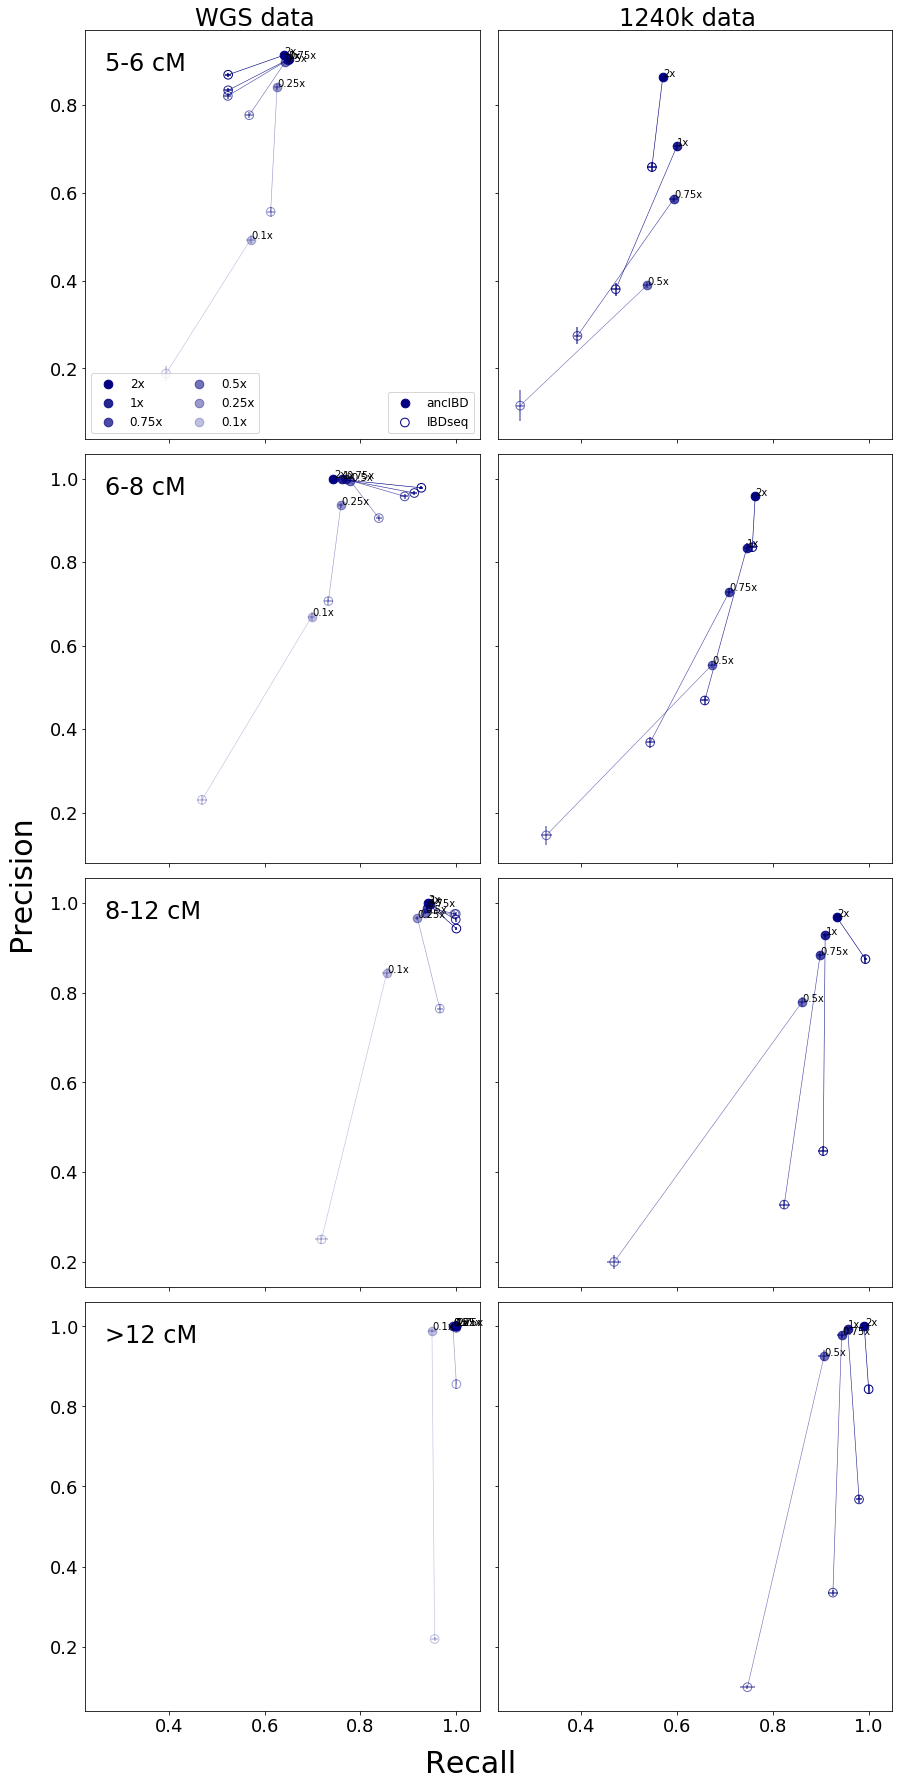

In [9]:

import matplotlib.pyplot as plt

bins = [(5,6), (6,8), (8,12), (12,np.inf)]
covs = ['cov2', 'cov1', 'cov3over4', 'cov1over2', 'cov1over4', 'cov1over10']
cov2str = ['2x', '1x', '0.75x', '0.5x', '0.25x', '0.1x']
alphas = [1.0, 0.85, 0.7, 0.55, 0.4, 0.25]
fig, axs = plt.subplots(4, 2, sharex=True, sharey='row', figsize=(12, 24), tight_layout=True)

shift_x = 1e-3
shift_y = 1e-3

#masks = readMaskTrack('/mnt/archgen/users/yilei/tools/hapBLOCK/empirical/v51_6cM/mask.track')
masks = None

path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion/MAC0/merged.glimpse.GP99.transversion_only.seg'
#path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion/MAC0/merged.glimpse.GP99.transversion_only_masked.seg'

#path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion_trim5/merged.glimpse.GP99.transversion_only.seg'

for index, bin in enumerate(bins):
    print(f'doing bin: {bin}')
    i = index
    j = 0
    ppv_ancIBD, ppv_se_ancIBD, sensitivity_ancIBD, sensitivity_se_ancIBD = get_ppv_sensitivity_allCov(covs, bin[0], bin[1], path2GroundTruth, datatype="wgs", mode='ancIBD', masks=masks, snpcm=220)
    ppv_ibis, ppv_se_ibis, sensitivity_ibis, sensitivity_se_ibis = get_ppv_sensitivity_allCov(covs, bin[0], bin[1], path2GroundTruth, datatype="wgs", mode='IBDseq', masks=masks, snpcm=220)

    legend_obj = []
    for k in range(len(covs)):
        scatter1 = axs[i,j].scatter(sensitivity_ancIBD[k], ppv_ancIBD[k], color='navy', alpha=alphas[k], marker='o', s=75, label=cov2str[k])
        scatter2 = axs[i,j].scatter(sensitivity_ibis[k], ppv_ibis[k], color='navy', alpha=alphas[k], marker='o', facecolors='none', s=75)
        axs[i,j].plot([sensitivity_ancIBD[k], sensitivity_ibis[k]], [ppv_ancIBD[k], ppv_ibis[k]], color='navy', alpha=alphas[k], linewidth=0.6)
        axs[i,j].errorbar(sensitivity_ancIBD[k], ppv_ancIBD[k], yerr=ppv_se_ancIBD[k], xerr=sensitivity_se_ancIBD[k], ecolor='navy', alpha=alphas[k])
        axs[i,j].errorbar(sensitivity_ibis[k], ppv_ibis[k], yerr=ppv_se_ibis[k], xerr=sensitivity_se_ibis[k], ecolor='navy', alpha=alphas[k])

        if k == 0:
            legend_obj.append(scatter1)
            legend_obj.append(scatter2)
    if i == 0:
        legend1 = axs[i,j].legend(loc='lower left', ncol=2, fontsize='large')
        axs[i,j].legend(legend_obj, ['ancIBD', 'IBDseq'], loc='lower right', fontsize='large')
        axs[i,j].add_artist(legend1)

    axs[i,j].annotate('2x', (shift_x + sensitivity_ancIBD[0], shift_y + ppv_ancIBD[0]))
    axs[i,j].annotate('1x', (shift_x + sensitivity_ancIBD[1], shift_y + ppv_ancIBD[1]))
    axs[i,j].annotate('0.75x', (shift_x + sensitivity_ancIBD[2], shift_y + ppv_ancIBD[2]))
    axs[i,j].annotate('0.5x', (shift_x + sensitivity_ancIBD[3], shift_y + ppv_ancIBD[3]))
    axs[i,j].annotate('0.25x', (shift_x + sensitivity_ancIBD[4], shift_y + ppv_ancIBD[4]))
    axs[i,j].annotate('0.1x', (shift_x + sensitivity_ancIBD[5], shift_y + ppv_ancIBD[5]))

    axs[i,j].tick_params(axis='both', labelsize=18)


  

    titleStr = f'{bin[0]}-{bin[1]} cM' if index != len(bins) -1 else f'>{bin[0]} cM'
    axs[i,j].text(0.05, 0.9, titleStr, fontsize=24, transform=axs[i,j].transAxes)




# #############
# ### plot results for downsampled 1240k bam files
for index, bin in enumerate(bins):
    i = index
    j = 1

    ppv_ancIBD1240k, ppv_se_ancIBD1240k, sensitivity_ancIBD1240k, sensitivity_se_ancIBD1240k = get_ppv_sensitivity_allCov(covs[:4], bin[0], bin[1], path2GroundTruth, datatype="1240k", mode='ancIBD', masks=masks, snpcm=220)
    ppv_ibis1240k, ppv_se_ibis1240k, sensitivity_ibis1240k, sensitivity_se_ibis1240k = get_ppv_sensitivity_allCov(covs[:4], bin[0], bin[1], path2GroundTruth, datatype="1240k", mode='IBDseq', masks=masks, snpcm=220)
    
    for k in range(len(covs[:4])):
        color_index = k
        axs[i,j].scatter(sensitivity_ancIBD1240k[k], ppv_ancIBD1240k[k], color='navy', alpha=alphas[color_index], marker='o', s=75)
        axs[i,j].scatter(sensitivity_ibis1240k[k], ppv_ibis1240k[k], color='navy', alpha=alphas[color_index], marker='o', facecolors='none', s=75)
        axs[i,j].plot([sensitivity_ancIBD1240k[k], sensitivity_ibis1240k[k]], [ppv_ancIBD1240k[k], ppv_ibis1240k[k]], color='navy', alpha=alphas[color_index], linewidth=0.6)
        axs[i,j].errorbar(sensitivity_ancIBD1240k[k], ppv_ancIBD1240k[k], yerr=ppv_se_ancIBD1240k[k], xerr=sensitivity_se_ancIBD1240k[k], ecolor='navy', alpha=alphas[k])
        axs[i,j].errorbar(sensitivity_ibis1240k[k], ppv_ibis1240k[k], yerr=ppv_se_ibis1240k[k], xerr=sensitivity_se_ibis1240k[k], ecolor='navy', alpha=alphas[k])


    axs[i,j].annotate('2x', (shift_x + sensitivity_ancIBD1240k[0], shift_y + ppv_ancIBD1240k[0]))
    axs[i,j].annotate('1x', (shift_x + sensitivity_ancIBD1240k[1], shift_y + ppv_ancIBD1240k[1]))
    axs[i,j].annotate('0.75x', (shift_x + sensitivity_ancIBD1240k[2], shift_y + ppv_ancIBD1240k[2]))
    axs[i,j].annotate('0.5x', (shift_x + sensitivity_ancIBD1240k[3], shift_y + ppv_ancIBD1240k[3]))

    axs[i,j].tick_params(axis='both', labelsize=18)



fig.text(0.5, -0.01, 'Recall', ha='center', va='center', fontsize=30)
fig.text(-0.02, 0.5, 'Precision', ha='center', va='center', rotation='vertical', fontsize=30)
fig.text(0.25, 1.0, 'WGS data', ha='center', va='center', fontsize=24)
fig.text(0.75, 1.0, '1240k data', ha='center', va='center', fontsize=24)

plt.savefig('ibd_benchmark_glimpse_IBDseq.png', dpi=300, bbox_inches = "tight")
plt.savefig('ibd_benchmark_glimpse_IBDseq.pdf', dpi=300, bbox_inches = "tight")

doing bin: (5, 6)
doing bin: (6, 8)
doing bin: (8, 12)
doing bin: (12, inf)


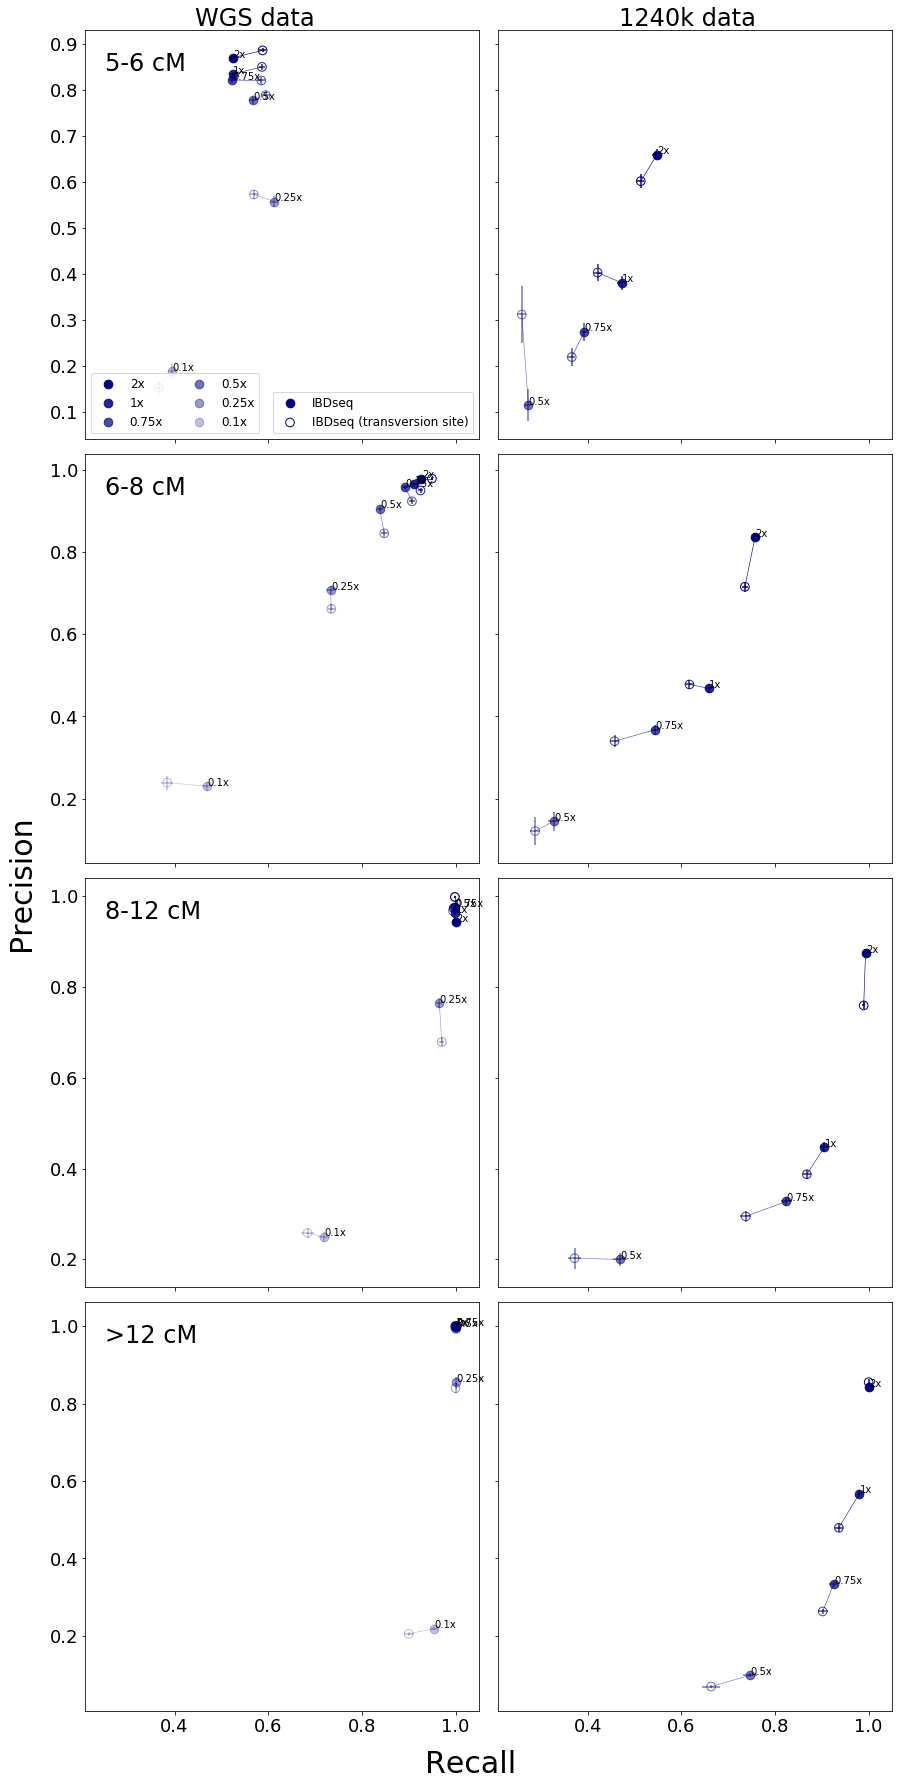

In [10]:
import matplotlib.pyplot as plt

bins = [(5,6), (6,8), (8,12), (12,np.inf)]
covs = ['cov2', 'cov1', 'cov3over4', 'cov1over2', 'cov1over4', 'cov1over10']
cov2str = ['2x', '1x', '0.75x', '0.5x', '0.25x', '0.1x']
alphas = [1.0, 0.85, 0.7, 0.55, 0.4, 0.25]
fig, axs = plt.subplots(4, 2, sharex=True, sharey='row', figsize=(12, 24), tight_layout=True)

shift_x = 1e-3
shift_y = 1e-3

#masks = readMaskTrack('/mnt/archgen/users/yilei/tools/hapBLOCK/empirical/v51_6cM/mask.track')
masks = None

path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion/MAC0/merged.glimpse.GP99.transversion_only.seg'
#path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion/MAC0/merged.glimpse.GP99.transversion_only_masked.seg'

#path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion_trim5/merged.glimpse.GP99.transversion_only.seg'

for index, bin in enumerate(bins):
    print(f'doing bin: {bin}')
    i = index
    j = 0
    ppv_ancIBD, ppv_se_ancIBD, sensitivity_ancIBD, sensitivity_se_ancIBD = get_ppv_sensitivity_allCov(covs, bin[0], bin[1], path2GroundTruth, datatype="wgs", mode='IBDseq', masks=masks, snpcm=220)
    ppv_ibis, ppv_se_ibis, sensitivity_ibis, sensitivity_se_ibis = get_ppv_sensitivity_allCov(covs, bin[0], bin[1], path2GroundTruth, datatype="wgs", mode='IBDseq_tvOnly', masks=masks, snpcm=220)

    legend_obj = []
    for k in range(len(covs)):
        scatter1 = axs[i,j].scatter(sensitivity_ancIBD[k], ppv_ancIBD[k], color='navy', alpha=alphas[k], marker='o', s=75, label=cov2str[k])
        scatter2 = axs[i,j].scatter(sensitivity_ibis[k], ppv_ibis[k], color='navy', alpha=alphas[k], marker='o', facecolors='none', s=75)
        axs[i,j].plot([sensitivity_ancIBD[k], sensitivity_ibis[k]], [ppv_ancIBD[k], ppv_ibis[k]], color='navy', alpha=alphas[k], linewidth=0.6)
        axs[i,j].errorbar(sensitivity_ancIBD[k], ppv_ancIBD[k], yerr=ppv_se_ancIBD[k], xerr=sensitivity_se_ancIBD[k], ecolor='navy', alpha=alphas[k])
        axs[i,j].errorbar(sensitivity_ibis[k], ppv_ibis[k], yerr=ppv_se_ibis[k], xerr=sensitivity_se_ibis[k], ecolor='navy', alpha=alphas[k])

        if k == 0:
            legend_obj.append(scatter1)
            legend_obj.append(scatter2)
    if i == 0:
        legend1 = axs[i,j].legend(loc='lower left', ncol=2, fontsize='large')
        axs[i,j].legend(legend_obj, ['IBDseq', 'IBDseq (transversion site)'], loc='lower right', fontsize='large')
        axs[i,j].add_artist(legend1)

    axs[i,j].annotate('2x', (shift_x + sensitivity_ancIBD[0], shift_y + ppv_ancIBD[0]))
    axs[i,j].annotate('1x', (shift_x + sensitivity_ancIBD[1], shift_y + ppv_ancIBD[1]))
    axs[i,j].annotate('0.75x', (shift_x + sensitivity_ancIBD[2], shift_y + ppv_ancIBD[2]))
    axs[i,j].annotate('0.5x', (shift_x + sensitivity_ancIBD[3], shift_y + ppv_ancIBD[3]))
    axs[i,j].annotate('0.25x', (shift_x + sensitivity_ancIBD[4], shift_y + ppv_ancIBD[4]))
    axs[i,j].annotate('0.1x', (shift_x + sensitivity_ancIBD[5], shift_y + ppv_ancIBD[5]))

    axs[i,j].tick_params(axis='both', labelsize=18)


  

    titleStr = f'{bin[0]}-{bin[1]} cM' if index != len(bins) -1 else f'>{bin[0]} cM'
    axs[i,j].text(0.05, 0.9, titleStr, fontsize=24, transform=axs[i,j].transAxes)




# #############
# ### plot results for downsampled 1240k bam files
for index, bin in enumerate(bins):
    i = index
    j = 1

    ppv_ancIBD1240k, ppv_se_ancIBD1240k, sensitivity_ancIBD1240k, sensitivity_se_ancIBD1240k = get_ppv_sensitivity_allCov(covs[:4], bin[0], bin[1], path2GroundTruth, datatype="1240k", mode='IBDseq', masks=masks, snpcm=220)
    ppv_ibis1240k, ppv_se_ibis1240k, sensitivity_ibis1240k, sensitivity_se_ibis1240k = get_ppv_sensitivity_allCov(covs[:4], bin[0], bin[1], path2GroundTruth, datatype="1240k", mode='IBDseq_tvOnly', masks=masks, snpcm=220)
    
    for k in range(len(covs[:4])):
        color_index = k
        axs[i,j].scatter(sensitivity_ancIBD1240k[k], ppv_ancIBD1240k[k], color='navy', alpha=alphas[color_index], marker='o', s=75)
        axs[i,j].scatter(sensitivity_ibis1240k[k], ppv_ibis1240k[k], color='navy', alpha=alphas[color_index], marker='o', facecolors='none', s=75)
        axs[i,j].plot([sensitivity_ancIBD1240k[k], sensitivity_ibis1240k[k]], [ppv_ancIBD1240k[k], ppv_ibis1240k[k]], color='navy', alpha=alphas[color_index], linewidth=0.6)
        axs[i,j].errorbar(sensitivity_ancIBD1240k[k], ppv_ancIBD1240k[k], yerr=ppv_se_ancIBD1240k[k], xerr=sensitivity_se_ancIBD1240k[k], ecolor='navy', alpha=alphas[k])
        axs[i,j].errorbar(sensitivity_ibis1240k[k], ppv_ibis1240k[k], yerr=ppv_se_ibis1240k[k], xerr=sensitivity_se_ibis1240k[k], ecolor='navy', alpha=alphas[k])


    axs[i,j].annotate('2x', (shift_x + sensitivity_ancIBD1240k[0], shift_y + ppv_ancIBD1240k[0]))
    axs[i,j].annotate('1x', (shift_x + sensitivity_ancIBD1240k[1], shift_y + ppv_ancIBD1240k[1]))
    axs[i,j].annotate('0.75x', (shift_x + sensitivity_ancIBD1240k[2], shift_y + ppv_ancIBD1240k[2]))
    axs[i,j].annotate('0.5x', (shift_x + sensitivity_ancIBD1240k[3], shift_y + ppv_ancIBD1240k[3]))

    axs[i,j].tick_params(axis='both', labelsize=18)



fig.text(0.5, -0.01, 'Recall', ha='center', va='center', fontsize=30)
fig.text(-0.02, 0.5, 'Precision', ha='center', va='center', rotation='vertical', fontsize=30)
fig.text(0.25, 1.0, 'WGS data', ha='center', va='center', fontsize=24)
fig.text(0.75, 1.0, '1240k data', ha='center', va='center', fontsize=24)
plt.savefig('ibd_benchmark_glimpse_IBDseq_tvOnly.png', dpi=300, bbox_inches = "tight")
plt.savefig('ibd_benchmark_glimpse_IBDseq_tvOnly.pdf', dpi=300, bbox_inches = "tight")

# test of a different way to draw the figures

doing bin: (5, 6)
doing bin: (6, 8)
doing bin: (8, 12)
doing bin: (12, inf)


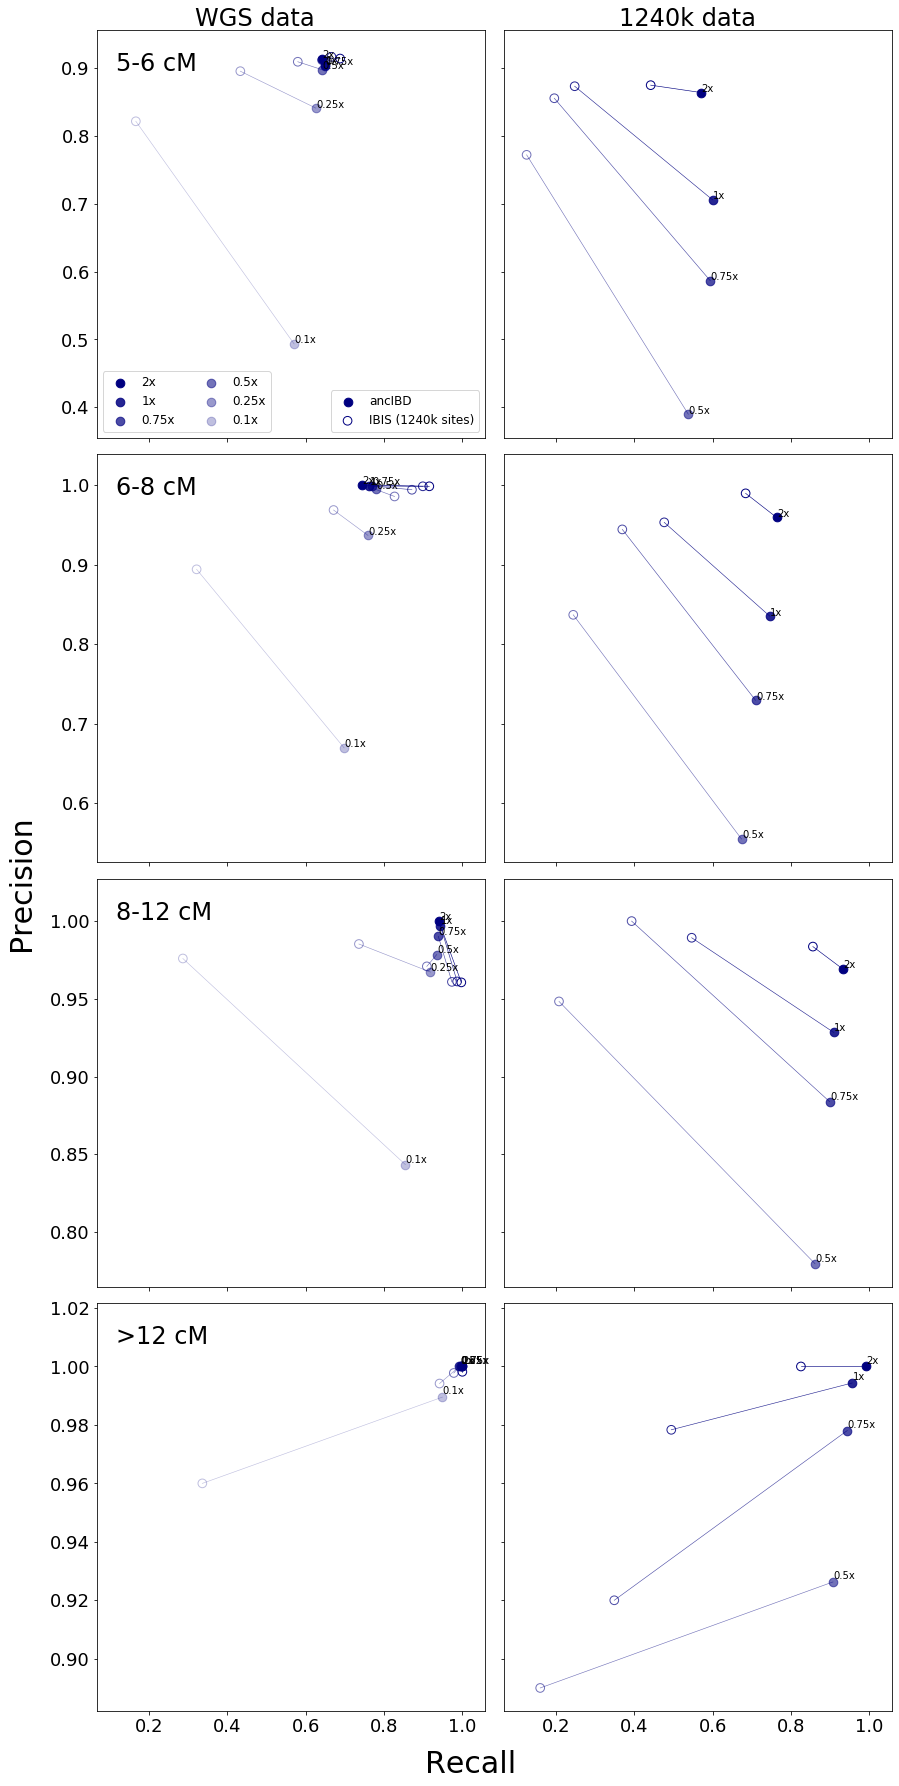

In [20]:
import matplotlib.pyplot as plt

bins = [(5,6), (6,8), (8,12), (12,np.inf)]
covs = ['cov2', 'cov1', 'cov3over4', 'cov1over2', 'cov1over4', 'cov1over10']
cov2str = ['2x', '1x', '0.75x', '0.5x', '0.25x', '0.1x']
alphas = [1.0, 0.85, 0.7, 0.55, 0.4, 0.25]
fig, axs = plt.subplots(4, 2, sharex=True, sharey='row', figsize=(12, 24), tight_layout=True)

shift_x = 1e-3
shift_y = 1e-3

#masks = readMaskTrack('/mnt/archgen/users/yilei/tools/hapBLOCK/empirical/v51_6cM/mask.track')
masks = None

path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion/MAC0/merged.glimpse.GP99.transversion_only.seg'
#path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion/MAC0/merged.glimpse.GP99.transversion_only_masked.seg'

#path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion_trim5/merged.glimpse.GP99.transversion_only.seg'

for index, bin in enumerate(bins):
    print(f'doing bin: {bin}')
    i = index
    j = 0
    ppv_ancIBD, ppv_se_ancIBD, sensitivity_ancIBD, sensitivity_se_ancIBD = get_ppv_sensitivity_allCov(covs, bin[0], bin[1], path2GroundTruth, datatype="wgs", mode='ancIBD', masks=masks, snpcm=220)
    ppv_ibis, ppv_se_ibis, sensitivity_ibis, sensitivity_se_ibis = get_ppv_sensitivity_allCov(covs, bin[0], bin[1], path2GroundTruth, datatype="wgs", mode='IBIS_1240k', masks=masks, snpcm=220)

    legend_obj = []
    for k in range(len(covs)):
        scatter1 = axs[i,j].scatter(sensitivity_ancIBD[k], ppv_ancIBD[k], color='navy', alpha=alphas[k], marker='o', s=75, label=cov2str[k])
        scatter2 = axs[i,j].scatter(sensitivity_ibis[k], ppv_ibis[k], color='navy', alpha=alphas[k], marker='o', facecolors='none', s=75)
        axs[i,j].plot([sensitivity_ancIBD[k], sensitivity_ibis[k]], [ppv_ancIBD[k], ppv_ibis[k]], color='navy', alpha=alphas[k], linewidth=0.6)
        if k == 0:
            legend_obj.append(scatter1)
            legend_obj.append(scatter2)
    if i == 0:
        legend1 = axs[i,j].legend(loc='lower left', ncol=2, fontsize='large')
        axs[i,j].legend(legend_obj, ['ancIBD', 'IBIS (1240k sites)'], loc='lower right', fontsize='large')
        axs[i,j].add_artist(legend1)

    axs[i,j].annotate('2x', (shift_x + sensitivity_ancIBD[0], shift_y + ppv_ancIBD[0]))
    axs[i,j].annotate('1x', (shift_x + sensitivity_ancIBD[1], shift_y + ppv_ancIBD[1]))
    axs[i,j].annotate('0.75x', (shift_x + sensitivity_ancIBD[2], shift_y + ppv_ancIBD[2]))
    axs[i,j].annotate('0.5x', (shift_x + sensitivity_ancIBD[3], shift_y + ppv_ancIBD[3]))
    axs[i,j].annotate('0.25x', (shift_x + sensitivity_ancIBD[4], shift_y + ppv_ancIBD[4]))
    axs[i,j].annotate('0.1x', (shift_x + sensitivity_ancIBD[5], shift_y + ppv_ancIBD[5]))

    axs[i,j].tick_params(axis='both', labelsize=18)


  

    titleStr = f'{bin[0]}-{bin[1]} cM' if index != len(bins) -1 else f'>{bin[0]} cM'
    axs[i,j].text(0.05, 0.9, titleStr, fontsize=24, transform=axs[i,j].transAxes)




# #############
# ### plot results for downsampled 1240k bam files
for index, bin in enumerate(bins):
    i = index
    j = 1

    ppv_ancIBD1240k, ppv_se_ancIBD1240k, sensitivity_ancIBD1240k, sensitivity_se_ancIBD1240k = get_ppv_sensitivity_allCov(covs[:4], bin[0], bin[1], path2GroundTruth, datatype="1240k", mode='ancIBD', masks=masks, snpcm=220)
    ppv_ibis1240k, ppv_se_ibis1240k, sensitivity_ibis1240k, sensitivity_se_ibis1240k = get_ppv_sensitivity_allCov(covs[:4], bin[0], bin[1], path2GroundTruth, datatype="1240k", mode='IBIS_1240k', masks=masks, snpcm=220)
    
    for k in range(len(covs[:4])):
        color_index = k
        axs[i,j].scatter(sensitivity_ancIBD1240k[k], ppv_ancIBD1240k[k], color='navy', alpha=alphas[color_index], marker='o', s=75)
        axs[i,j].scatter(sensitivity_ibis1240k[k], ppv_ibis1240k[k], color='navy', alpha=alphas[color_index], marker='o', facecolors='none', s=75)
        axs[i,j].plot([sensitivity_ancIBD1240k[k], sensitivity_ibis1240k[k]], [ppv_ancIBD1240k[k], ppv_ibis1240k[k]], color='navy', alpha=alphas[color_index], linewidth=0.6)


    axs[i,j].annotate('2x', (shift_x + sensitivity_ancIBD1240k[0], shift_y + ppv_ancIBD1240k[0]))
    axs[i,j].annotate('1x', (shift_x + sensitivity_ancIBD1240k[1], shift_y + ppv_ancIBD1240k[1]))
    axs[i,j].annotate('0.75x', (shift_x + sensitivity_ancIBD1240k[2], shift_y + ppv_ancIBD1240k[2]))
    axs[i,j].annotate('0.5x', (shift_x + sensitivity_ancIBD1240k[3], shift_y + ppv_ancIBD1240k[3]))

    axs[i,j].tick_params(axis='both', labelsize=18)



fig.text(0.5, -0.01, 'Recall', ha='center', va='center', fontsize=30)
fig.text(-0.02, 0.5, 'Precision', ha='center', va='center', rotation='vertical', fontsize=30)

fig.text(0.25, 1.0, 'WGS data', ha='center', va='center', fontsize=24)
fig.text(0.75, 1.0, '1240k data', ha='center', va='center', fontsize=24)


plt.savefig('test.png', dpi=300, bbox_inches = "tight")
plt.savefig('test.pdf', dpi=300, bbox_inches = "tight")

# compare ancIBD with IBIS (param tuned to have higher power), no mask, using 1240k snps

doing bin: (5, 6)
doing bin: (6, 8)
doing bin: (8, 12)
doing bin: (12, inf)


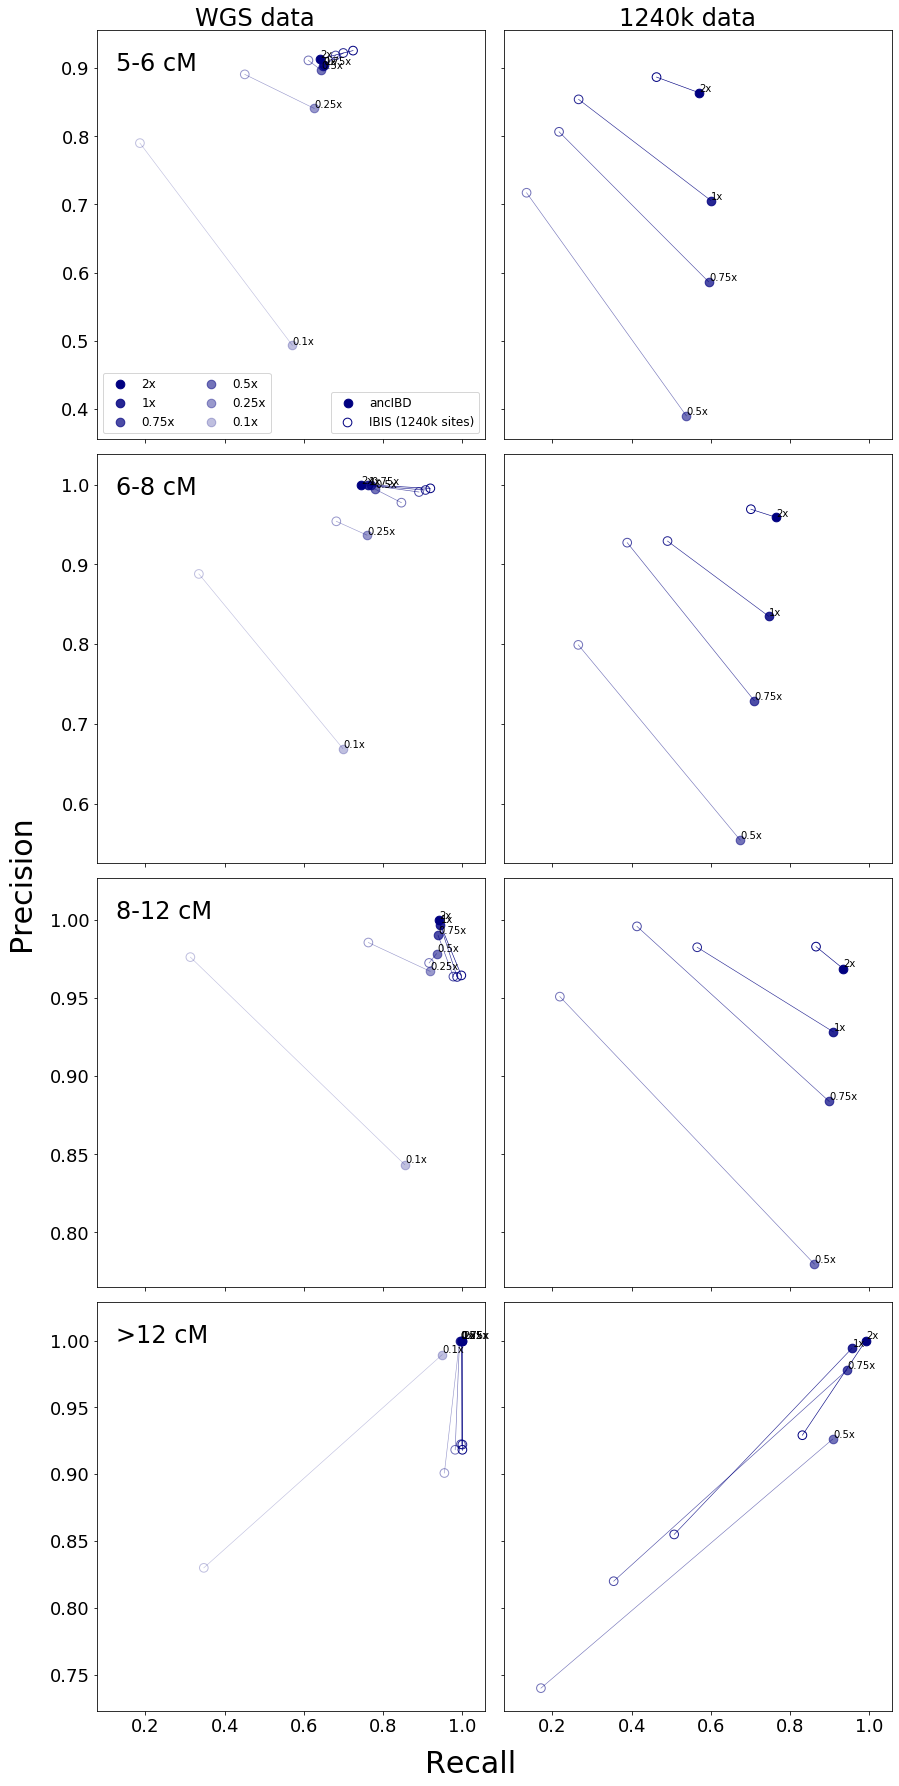

In [8]:
import matplotlib.pyplot as plt

bins = [(5,6), (6,8), (8,12), (12,np.inf)]
covs = ['cov2', 'cov1', 'cov3over4', 'cov1over2', 'cov1over4', 'cov1over10']
cov2str = ['2x', '1x', '0.75x', '0.5x', '0.25x', '0.1x']
alphas = [1.0, 0.85, 0.7, 0.55, 0.4, 0.25]
fig, axs = plt.subplots(4, 2, sharex=True, sharey='row', figsize=(12, 24), tight_layout=True)

shift_x = 1e-3
shift_y = 1e-3

#masks = readMaskTrack('/mnt/archgen/users/yilei/tools/hapBLOCK/empirical/v51_6cM/mask.track')
masks = None

path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion/MAC0/merged.glimpse.GP99.transversion_only.seg'
#path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion/MAC0/merged.glimpse.GP99.transversion_only_masked.seg'

#path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion_trim5/merged.glimpse.GP99.transversion_only.seg'

for index, bin in enumerate(bins):
    print(f'doing bin: {bin}')
    i = index
    j = 0
    ppv_ancIBD, ppv_se_ancIBD, sensitivity_ancIBD, sensitivity_se_ancIBD = get_ppv_sensitivity_allCov(covs, bin[0], bin[1], path2GroundTruth, datatype="wgs", mode='ancIBD', masks=masks, snpcm=220)
    ppv_ibis, ppv_se_ibis, sensitivity_ibis, sensitivity_se_ibis = get_ppv_sensitivity_allCov(covs, bin[0], bin[1], path2GroundTruth, datatype="wgs", mode='IBIS_1240k_relaxed', masks=masks)

    legend_obj = []
    for k in range(len(covs)):
        scatter1 = axs[i,j].scatter(sensitivity_ancIBD[k], ppv_ancIBD[k], color='navy', alpha=alphas[k], marker='o', s=75, label=cov2str[k])
        scatter2 = axs[i,j].scatter(sensitivity_ibis[k], ppv_ibis[k], color='navy', alpha=alphas[k], marker='o', facecolors='none', s=75)
        axs[i,j].plot([sensitivity_ancIBD[k], sensitivity_ibis[k]], [ppv_ancIBD[k], ppv_ibis[k]], color='navy', alpha=alphas[k], linewidth=0.6)
        if k == 0:
            legend_obj.append(scatter1)
            legend_obj.append(scatter2)
    if i == 0:
        legend1 = axs[i,j].legend(loc='lower left', ncol=2, fontsize='large')
        axs[i,j].legend(legend_obj, ['ancIBD', 'IBIS (1240k sites)'], loc='lower right', fontsize='large')
        axs[i,j].add_artist(legend1)

    axs[i,j].annotate('2x', (shift_x + sensitivity_ancIBD[0], shift_y + ppv_ancIBD[0]))
    axs[i,j].annotate('1x', (shift_x + sensitivity_ancIBD[1], shift_y + ppv_ancIBD[1]))
    axs[i,j].annotate('0.75x', (shift_x + sensitivity_ancIBD[2], shift_y + ppv_ancIBD[2]))
    axs[i,j].annotate('0.5x', (shift_x + sensitivity_ancIBD[3], shift_y + ppv_ancIBD[3]))
    axs[i,j].annotate('0.25x', (shift_x + sensitivity_ancIBD[4], shift_y + ppv_ancIBD[4]))
    axs[i,j].annotate('0.1x', (shift_x + sensitivity_ancIBD[5], shift_y + ppv_ancIBD[5]))

    axs[i,j].tick_params(axis='both', labelsize=18)


  

    titleStr = f'{bin[0]}-{bin[1]} cM' if index != len(bins) -1 else f'>{bin[0]} cM'
    axs[i,j].text(0.05, 0.9, titleStr, fontsize=24, transform=axs[i,j].transAxes)




# #############
# ### plot results for downsampled 1240k bam files
for index, bin in enumerate(bins):
    i = index
    j = 1

    ppv_ancIBD1240k, ppv_se_ancIBD1240k, sensitivity_ancIBD1240k, sensitivity_se_ancIBD1240k = get_ppv_sensitivity_allCov(covs[:4], bin[0], bin[1], path2GroundTruth, datatype="1240k", mode='ancIBD', masks=masks, snpcm=220)
    ppv_ibis1240k, ppv_se_ibis1240k, sensitivity_ibis1240k, sensitivity_se_ibis1240k = get_ppv_sensitivity_allCov(covs[:4], bin[0], bin[1], path2GroundTruth, datatype="1240k", mode='IBIS_1240k_relaxed', masks=masks)
    
    for k in range(len(covs[:4])):
        color_index = k
        axs[i,j].scatter(sensitivity_ancIBD1240k[k], ppv_ancIBD1240k[k], color='navy', alpha=alphas[color_index], marker='o', s=75)
        axs[i,j].scatter(sensitivity_ibis1240k[k], ppv_ibis1240k[k], color='navy', alpha=alphas[color_index], marker='o', facecolors='none', s=75)
        axs[i,j].plot([sensitivity_ancIBD1240k[k], sensitivity_ibis1240k[k]], [ppv_ancIBD1240k[k], ppv_ibis1240k[k]], color='navy', alpha=alphas[color_index], linewidth=0.6)


    axs[i,j].annotate('2x', (shift_x + sensitivity_ancIBD1240k[0], shift_y + ppv_ancIBD1240k[0]))
    axs[i,j].annotate('1x', (shift_x + sensitivity_ancIBD1240k[1], shift_y + ppv_ancIBD1240k[1]))
    axs[i,j].annotate('0.75x', (shift_x + sensitivity_ancIBD1240k[2], shift_y + ppv_ancIBD1240k[2]))
    axs[i,j].annotate('0.5x', (shift_x + sensitivity_ancIBD1240k[3], shift_y + ppv_ancIBD1240k[3]))

    axs[i,j].tick_params(axis='both', labelsize=18)



fig.text(0.5, -0.01, 'Recall', ha='center', va='center', fontsize=30)
fig.text(-0.02, 0.5, 'Precision', ha='center', va='center', rotation='vertical', fontsize=30)
fig.text(0.25, 1.0, 'WGS data', ha='center', va='center', fontsize=24)
fig.text(0.75, 1.0, '1240k data', ha='center', va='center', fontsize=24)

plt.savefig('ibd_benchmark_glimpse_1240k_highPower.png', dpi=300, bbox_inches = "tight")
plt.savefig('ibd_benchmark_glimpse_1240k_highPower.pdf', dpi=300, bbox_inches = "tight")